# EDA
**EDA es el proceso de Análisis Exploratorio de la Información (data)**<br>
Implica examinar y entender las características del dataset provisto.<br>
El objetivo primario del EDA es:
* resumir las características principales de la data, en general con la ayuda de gráficos, representaciones y análisis estadísticos.
* identificar patrones, relaciones anomalias y potenciales descubrimientos que luego guiaran el análisis y reportes para la toma de decisiones.

Las etapas son:
## 1.  Carga de los datos
## 2.  Entendimiento de la estructura de los datos

## 3.  Resumen estadístico de la información
#### 3.1 Análisis de Variables -  **Univariable**
    Para cada variable del dataset por separado.<br>
    Se analizan en detalle para conocer su rango y tendencias, distribución y encontrar patrones. <br>

#### 3.2 Análisis **Bi Variable**
    Es el análisis que se realiza sobre dos variables para:
    *   Determinar de manera estadística si existe una relación entre ambas
    *   En que grado se relacionan, si es que estan relacionadas
    *   Para luego, conociendo el comportamiento de una predecir el comportamiento de la segunda<br>

#### 3.3 Análisis **Multivariable** 
    En los modelos estadisticos, el análisis multivariable permite definir si una variable tiene dependencias entre dos o mas variables.

### 3.4  Visualización de los datos
### 3.5  Identificar Patrones y Anomalias
### 3.6  Iterar y refinar el análisis

# 1. Carga de la data
Vamos a importa el dataset a un DataFrame de Pandas para luego realizar el análisis de la información. 

In [1]:
# cargar los datos desde el archivo csv.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import seaborn as sns
from scipy.stats import zscore

In [2]:
df = pd.read_csv(r'C:\Users\flore\OneDrive\Escritorio\Call_Center\1 Call Center\Call_Center_1999_DataSet.csv', sep=";")

C:\Users\flore\AppData\Local\Temp\ipykernel_292\344555331.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\flore\OneDrive\Escritorio\Call_Center\1 Call Center\Call_Center_1999_DataSet.csv', sep=";")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   vru.line     444448 non-null  object
 1   call_id      444448 non-null  int64 
 2   customer_id  444448 non-null  object
 3   priority     444448 non-null  int64 
 4   type         444448 non-null  object
 5   date         444448 non-null  object
 6   vru_entry    444448 non-null  object
 7   vru_exit     444448 non-null  object
 8   vru_time     444448 non-null  int64 
 9   q_start      444448 non-null  object
 10  q_exit       444448 non-null  object
 11  q_time       444448 non-null  int64 
 12  outcome      444448 non-null  object
 13  ser_start    444448 non-null  object
 14  ser_exit     444448 non-null  object
 15  ser_time     444448 non-null  int64 
 16  server       444448 non-null  object
 17  startdate    444448 non-null  int64 
dtypes: int64(6), object(12)
memory usage: 61.0+ 

In [4]:
df.head()

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101,33119,0.0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0
4,AA0101,33120,0.0,0,PS,1999-01-01,8:03:14,8:03:24,10,0:00:00,0:00:00,0,AGENT,8:03:23,8:05:10,107,MICHAL,0


In [5]:
# Variables del data set
df.columns

Index(['vru.line', 'call_id', 'customer_id', 'priority', 'type', 'date',
       'vru_entry', 'vru_exit', 'vru_time', 'q_start', 'q_exit', 'q_time',
       'outcome', 'ser_start', 'ser_exit', 'ser_time', 'server', 'startdate'],
      dtype='object')

# 2. Entendimiento de la estructura de los datos
Por separado hemos realizado el análisis del dataset provisto para repasar las variables y datos que lo componen.
El mismo se encuentra en [Dataset_glossary](Dataset_glossary.md) 
<br>
Seguiremos profundizando ese entendimiento a lo largo de este trabajo con el objetivo encontrar duplicados, valores faltantes, outliers, valores fuera de rango, erroneos, etc;
Para todo ello, utlizamos las herramientas de Pyhton, pandas, matplotlib y otros.

## Ajustando los datatypes

In [6]:
# Ajustando Datatypes
df['vru.line'] = df['vru.line'].astype(str)
df['priority'] = df['priority'].astype('category')
df['outcome'] = df['outcome'].astype('category')
df['server'] = df['server'].astype('category')

## Datatypes para Customer_id
Tenemos muchos clientes sin identificar con customer_id = 0 <br>
Pudimos identificar que el customer_id es cero en dos casos:<br>

1. Cuando son *potenciales clientes* y por lo tanto no tienen customer_id <br>
2. Cuando el sistema de *identificacion de clientes al inicio de la llamada falla*. Entonces el sistema no los identifica. <br>

Para ello vamos a distinguirlos ya que en el primer caso, esta bien que el customer_id == 0.<br>
Pero los otros son una falla del sistema.<br>
*   Entonces  los identificamos en una nueva columna 'customer_category'  asignandoles una *identificacion especial*:
    1. *'CustomerNotId'* son los clientes que son clientes pero no han sido identificados.
    2. *Prospect Customer*: los nuevos clientes, o prospectos, los podemos identificar *'ProspectCust'*
    3. *'CustomerIded'* 

In [7]:
# corregimos el datatype para poder reclasificar a los clientes no identificados y a los prospectos de clientes
df['customer_id'] = pd.to_numeric(df['customer_id'], errors='coerce', downcast='integer')

In [8]:
total_clientes_sin_identificar = df['customer_id'][df['customer_id'] == 0].count() # hay 178572 calls sin customer_id
clientes_potenciales_con_id_0 = df['customer_id'][(df['customer_id'] == 0) & (df['type']== 'NW')].count() # del total de 178572 registros sin cliente, 
# 53016 son correctos porque corresponden a clientes prospectos
# Notar que los type == 'NW' deberian ser todos contactos de Clientes Prospectos por informacion:
clientes_potenciales = df['customer_id'][(df['type']== 'NW')].count() # son 67728 registros en total a estos los vamos a identificar con un customer_id == 999999999999
clientes_identificados = df['customer_id'][(df['customer_id']!=0 )].count()
print('el total de clientes sin identificar es =', total_clientes_sin_identificar)
print('el total de clientes potenciales que contactaron el callcenter =', clientes_potenciales)
print('el total de clientes potenciales que contactaron el callcenter sin identificar  =', clientes_potenciales_con_id_0)
print('el total de clientes identificados es =', clientes_identificados)

el total de clientes sin identificar es = 234552
el total de clientes potenciales que contactaron el callcenter = 67728
el total de clientes potenciales que contactaron el callcenter sin identificar  = 67397
el total de clientes identificados es = 209859


In [9]:
clientes_potenciales_con_id = df['customer_id'][(df['customer_id'] != 0) & (df['type']== 'NW')].count()
print('el total de clientes potenciales que contactaron el callcenter con id  =', clientes_potenciales_con_id)

el total de clientes potenciales que contactaron el callcenter con id  = 331


In [10]:
# De los clientes identificados
cantidad_unicos_customer_id = df['customer_id'].nunique() # method returns an array of unique values in the specified column.
print(cantidad_unicos_customer_id)
# Vemos las categorias para los valores unicos
value_counts = df['customer_id'].value_counts()
value_counts

12904


customer_id
0.0            234552
58859752.0       1996
58704610.0       1731
7191646.0        1502
54128681.0       1483
                ...  
29724127.0          1
29088614.0          1
310148853.0         1
27114818.0          1
53525267.0          1
Name: count, Length: 12904, dtype: int64

In [11]:
# Creamos una nueva columna para poder categorizarlos ** Sistema de Identificacion defectuoso
df['customer_category'] = df['customer_id']
df['customer_category'] = df['customer_category'].astype(str)
# le asignamos una identificacion unica a los prospectos de clientes para diferenciarlos de los clientes que no han podido ser identificados al momento de ingresar al call center
df.loc[(df['type'] == 'NW'), 'customer_id'] = 999999999999
df.loc[(df['type'] == 'NW'), 'customer_category'] = 'Prospect_Customer'
df.loc[(df['type'] != 'NW') & (df['customer_id'] == 0), 'customer_category'] = 'CustomerNotId'
df.loc[(df['customer_id'] != 0) & (df['customer_id'] != 999999999999), 'customer_category'] = 'CustomerIded' 

In [12]:
df.head()

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate,customer_category
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0,CustomerIded
1,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0,CustomerNotId
2,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0,CustomerIded
3,AA0101,33119,0.0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0,CustomerNotId
4,AA0101,33120,0.0,0,PS,1999-01-01,8:03:14,8:03:24,10,0:00:00,0:00:00,0,AGENT,8:03:23,8:05:10,107,MICHAL,0,CustomerNotId


In [13]:
cantidad_unicos_customer_category = df['customer_category'].nunique() # method returns an array of unique values in the specified column.
print(cantidad_unicos_customer_category)
# Agrupamos por cantidad para cada valor de la serie
value_counts = df['customer_category'].value_counts()
value_counts

3


customer_category
CustomerIded         209565
CustomerNotId        167155
Prospect_Customer     67728
Name: count, dtype: int64

### Type

In [14]:
cantidad_unicos_type = df['type'].nunique() # method returns an array of unique values in the specified column.
print(cantidad_unicos_type)
# Agrupamos por cantidad para cada valor de la serie
value_counts = df['type'].value_counts()
value_counts

8


type
PS     302522
NW      67728
NE      39342
IN      20732
TT      12289
PE       1824
 TT         6
AA          5
Name: count, dtype: int64

### AA
Estos registros de 'Type' no se corresponden a ningun tipo de operacion definida por el proceso del call center.
Es por esto que procedemos a eliminarlos ya que adicionalmente no tienen clientes asociados y terminan siendo HANG

In [15]:
df[df['type'] == 'AA']

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate,customer_category
538,AA0214,12065,0.0,0,AA,1999-01-01,6:41:36,6:41:47,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0,CustomerNotId
13233,AA0204,32649,0.0,0,AA,1999-01-13,4:12:26,4:13:04,38,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0,CustomerNotId
109637,AA0209,36319,0.0,0,AA,1999-04-08,17:35:38,17:35:46,8,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,90,CustomerNotId
242738,AA0215,22424,0.0,0,AA,1999-07-22,14:06:09,14:06:42,33,00:00:00,00:00:00,0,HANG,00:00:00,00:00:00,0,NO_SERVER,181,CustomerNotId
320222,AA0206,50452,0.0,0,AA,1999-09-24,06:58:39,06:59:13,34,00:00:00,00:00:00,0,HANG,00:00:00,00:00:00,0,NO_SERVER,243,CustomerNotId


In [16]:
# drop this records:
indexes_to_drop = [538,13233,109637,242738,320222]
df.drop(indexes_to_drop,inplace=True)

In [17]:
# identificamos los indices de los registros con TT diferente para corrgirlos
df[df['type'] == ' TT'] # Hay 6 registros que tienen un Type erroneo. lo corregimos

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate,customer_category
68094,AA0108,1695,0.0,0,TT,1999-03-03,10:37:26,10:37:48,22,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,59,CustomerNotId
73097,AA0112,2067,0.0,0,TT,1999-03-07,8:24:53,8:25:01,8,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,59,CustomerNotId
95287,AA0102,33340,0.0,0,TT,1999-03-24,15:09:49,15:09:54,5,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,59,CustomerNotId
95360,AA0105,38198,0.0,0,TT,1999-03-24,15:10:34,15:10:39,5,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,59,CustomerNotId
95414,AA0108,2116,0.0,0,TT,1999-03-24,15:09:35,15:09:39,4,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,59,CustomerNotId
98245,AA0108,2135,0.0,0,TT,1999-03-26,8:19:45,8:19:49,4,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,59,CustomerNotId


In [18]:
# Corregimos para normalizar todos 
index_list_TT = [68094,73097,95287,95360,95414,98245]
df.loc[index_list_TT,'type'] = 'TT'

In [19]:
# corrigo el datatype para que cambie de object a category
df['type'] = df['type'].astype('category')

In [20]:
df['type'].unique() # verifico que esten todos corregidos y solo haya los 6 tipos definidos en glossary

['PS', 'NW', 'PE', 'TT', 'IN', 'NE']
Categories (6, object): ['IN', 'NE', 'NW', 'PE', 'PS', 'TT']

In [21]:
cantidad_unicos_date = df['date'].nunique() # method returns an array of unique values in the specified column.
print(cantidad_unicos_date)
# Agrupamos por cantidad para cada valor de la serie
value_counts = df['date'].value_counts()
value_counts

363


date
1999-05-23    3064
1999-07-04    2589
1999-08-01    2375
1999-08-02    2363
1999-08-03    2345
              ... 
1999-09-25     110
1999-04-06      89
1999-07-24      36
1999-09-11      29
1999-05-21      14
Name: count, Length: 363, dtype: int64

# Date
Estan guardados como objetos, necesitamos que tenga datatype date

In [22]:
# La columna 'date' esta como string, no tiene valores nulos ni erroneos, pero hay que primero convertirlo y luego cambiar el datatype
df['date'] = pd.to_datetime(df['date'])

In [23]:
df.info() # ahora date aparece como datetime64

<class 'pandas.core.frame.DataFrame'>
Index: 444443 entries, 0 to 444447
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   vru.line           444443 non-null  object        
 1   call_id            444443 non-null  int64         
 2   customer_id        444406 non-null  float64       
 3   priority           444443 non-null  category      
 4   type               444443 non-null  category      
 5   date               444443 non-null  datetime64[ns]
 6   vru_entry          444443 non-null  object        
 7   vru_exit           444443 non-null  object        
 8   vru_time           444443 non-null  int64         
 9   q_start            444443 non-null  object        
 10  q_exit             444443 non-null  object        
 11  q_time             444443 non-null  int64         
 12  outcome            444443 non-null  category      
 13  ser_start          444443 non-null  object       

Ahora para los campos que registran los horarios, hora:minutos:segundos, donde se manejan las llamadas, colas de espera y tiempos de atención queremos que se guarden los tiempos.
Los campos identificados son:

- vru_entry
- vru_exit
- q_entry
- q_exit
- ser_entry
- ser_exit

In [24]:
# vamos a corregir las columnas de tiempo que estan guardadas como objetos que cuando la corregimos a datetime datatype toman la fecha del dia.
# para ello, creamos una nueva columna de fecha para poder convertirla a string y concatenar con ellas los datos de horas.
df['date2'] = df['date']
df['date2'] = df['date2'].dt.strftime('%Y-%m-%d')
# Convert 'vru_start' column to string
df['vru_entry'] = df['vru_entry'].astype(str)
df['vru_entry'] = pd.to_datetime(df['date2'] + ' ' + df['vru_entry'])

df['vru_exit'] = df['vru_exit'].astype(str)
df['vru_exit'] = pd.to_datetime(df['date2'] + ' ' + df['vru_exit'])

df['q_start'] = df['q_start'].astype(str)
df['q_start'] = pd.to_datetime(df['date2'] + ' ' + df['q_start'])

df['q_exit'] = df['q_exit'].astype(str) 
df['q_exit'] = pd.to_datetime(df['date2'] + ' ' + df['q_exit']) 

df['ser_start'] = df['ser_start'].astype(str)
df['ser_start'] = pd.to_datetime(df['date2'] + ' ' + df['ser_start'])

df['ser_exit'] = df['ser_exit'].astype(str)
df['ser_exit'] = pd.to_datetime(df['date2'] + ' ' + df['ser_exit'])


In [25]:
df.drop('date2',axis=1,inplace=True)

In [26]:
df.info() # verificamos que todas las columnas de tiempo esten corregidas

<class 'pandas.core.frame.DataFrame'>
Index: 444443 entries, 0 to 444447
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   vru.line           444443 non-null  object        
 1   call_id            444443 non-null  int64         
 2   customer_id        444406 non-null  float64       
 3   priority           444443 non-null  category      
 4   type               444443 non-null  category      
 5   date               444443 non-null  datetime64[ns]
 6   vru_entry          444443 non-null  datetime64[ns]
 7   vru_exit           444443 non-null  datetime64[ns]
 8   vru_time           444443 non-null  int64         
 9   q_start            444443 non-null  datetime64[ns]
 10  q_exit             444443 non-null  datetime64[ns]
 11  q_time             444443 non-null  int64         
 12  outcome            444443 non-null  category      
 13  ser_start          444443 non-null  datetime64[ns

In [27]:
df.head() # y que todas muestren la fecha del dia del llamado correcto

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate,customer_category
0,AA0101,33116,9664491.0,2,PS,1999-01-01,1999-01-01 00:00:31,1999-01-01 00:00:36,5,1999-01-01 00:00:36,1999-01-01 00:03:09,153,HANG,1999-01-01 00:00:00,1999-01-01 00:00:00,0,NO_SERVER,0,CustomerIded
1,AA0101,33117,0.0,0,PS,1999-01-01,1999-01-01 00:34:12,1999-01-01 00:34:23,11,1999-01-01 00:00:00,1999-01-01 00:00:00,0,HANG,1999-01-01 00:00:00,1999-01-01 00:00:00,0,NO_SERVER,0,CustomerNotId
2,AA0101,33118,27997683.0,2,PS,1999-01-01,1999-01-01 06:55:20,1999-01-01 06:55:26,6,1999-01-01 06:55:26,1999-01-01 06:55:43,17,AGENT,1999-01-01 06:55:43,1999-01-01 06:56:37,54,MICHAL,0,CustomerIded
3,AA0101,33119,0.0,0,PS,1999-01-01,1999-01-01 07:41:16,1999-01-01 07:41:26,10,1999-01-01 00:00:00,1999-01-01 00:00:00,0,AGENT,1999-01-01 07:41:25,1999-01-01 07:44:53,208,BASCH,0,CustomerNotId
4,AA0101,33120,0.0,0,PS,1999-01-01,1999-01-01 08:03:14,1999-01-01 08:03:24,10,1999-01-01 00:00:00,1999-01-01 00:00:00,0,AGENT,1999-01-01 08:03:23,1999-01-01 08:05:10,107,MICHAL,0,CustomerNotId


In [28]:
cantidad_unicos_outcome = df['outcome'].nunique() # method returns an array of unique values in the specified column.
print(cantidad_unicos_outcome)
# Agrupamos por cantidad para cada valor de la serie
value_counts = df['outcome'].value_counts()
value_counts

3


outcome
AGENT      353143
HANG        87701
PHANTOM      3599
Name: count, dtype: int64

In [29]:
df.head()

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate,customer_category
0,AA0101,33116,9664491.0,2,PS,1999-01-01,1999-01-01 00:00:31,1999-01-01 00:00:36,5,1999-01-01 00:00:36,1999-01-01 00:03:09,153,HANG,1999-01-01 00:00:00,1999-01-01 00:00:00,0,NO_SERVER,0,CustomerIded
1,AA0101,33117,0.0,0,PS,1999-01-01,1999-01-01 00:34:12,1999-01-01 00:34:23,11,1999-01-01 00:00:00,1999-01-01 00:00:00,0,HANG,1999-01-01 00:00:00,1999-01-01 00:00:00,0,NO_SERVER,0,CustomerNotId
2,AA0101,33118,27997683.0,2,PS,1999-01-01,1999-01-01 06:55:20,1999-01-01 06:55:26,6,1999-01-01 06:55:26,1999-01-01 06:55:43,17,AGENT,1999-01-01 06:55:43,1999-01-01 06:56:37,54,MICHAL,0,CustomerIded
3,AA0101,33119,0.0,0,PS,1999-01-01,1999-01-01 07:41:16,1999-01-01 07:41:26,10,1999-01-01 00:00:00,1999-01-01 00:00:00,0,AGENT,1999-01-01 07:41:25,1999-01-01 07:44:53,208,BASCH,0,CustomerNotId
4,AA0101,33120,0.0,0,PS,1999-01-01,1999-01-01 08:03:14,1999-01-01 08:03:24,10,1999-01-01 00:00:00,1999-01-01 00:00:00,0,AGENT,1999-01-01 08:03:23,1999-01-01 08:05:10,107,MICHAL,0,CustomerNotId


In [30]:
cantidad_unicos_server = df['server'].nunique() # method returns an array of unique values in the specified column.
print(cantidad_unicos_server)
# Agrupamos por cantidad para cada valor de la serie
value_counts = df['server'].value_counts()
value_counts

53


server
NO_SERVER       96506
SHARON          27492
STEREN          20500
AVNI            20111
MORIAH          19736
AVI             19455
KAZAV           18694
YITZ            17231
TOVA            17072
BASCH           15581
ZOHARI          15404
ROTH            15225
BENSION         13706
VICKY           13101
DORIT           12907
YIFAT           12172
ANAT             8727
GILI             7290
MIKI             6830
IDIT             6702
ZIPI             6245
ELI              5609
AVIDAN           5264
DARMON           4718
NAAMA            4645
GOLDIE           4070
GELBER           3976
SHLOMO           3234
MICHAL           2825
PINHAS           2092
Z2EYAL           2056
MEIR             1932
Z2NIRIT          1852
Z2ARIE           1567
Z2ELINOR         1223
BRUHI            1159
Z2OFERZ          1151
MOTI             1052
Z2IFAT            890
NO_SERVERAMA      883
TALI              775
Z2LIOR            734
Z2SPIEGEL         478
MOSHE             375
ANO_SERVERT       338
Z2O

In [31]:
cantidad_unicos_stardate = df['startdate'].nunique() # method returns an array of unique values in the specified column.
print(cantidad_unicos_stardate)
# Agrupamos por cantidad para cada valor de la serie
value_counts = df['startdate'].value_counts()
value_counts

12


startdate
334    43065
212    42078
304    41019
120    39553
181    39021
59     38801
151    37935
273    34625
31     33344
90     32035
0      31597
243    31370
Name: count, dtype: int64

In [32]:
df = df.drop('startdate',axis=1)

In [33]:
df.describe()

,call_id,customer_id,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,ser_start,ser_exit,ser_time
count,444443.000000,4.444060e+05,444443,444443,444443,444443.000000,444443,444443,444443.000000,444443,444443,444443.000000
mean,31928.750105,2.193506e+12,1999-07-06 09:56:18.658680448,1999-07-07 00:23:34.084071296,1999-07-07 00:23:44.369989120,10.285917,1999-07-06 18:25:20.438168576,1999-07-06 18:26:07.779098752,59.004968,1999-07-06 21:39:30.735365760,1999-07-06 21:41:06.517200128,152.563492
min,1169.000000,0.000000e+00,1999-01-01 00:00:00,1999-01-01 00:00:02,1999-01-01 00:00:08,-362.000000,1999-01-01 00:00:00,1999-01-01 00:00:00,0.000000,1999-01-01 00:00:00,1999-01-01 00:00:00,0.000000
25%,21449.000000,0.000000e+00,1999-04-11 00:00:00,1999-04-11 09:01:07.500000,1999-04-11 09:01:12.500000,6.000000,1999-04-11 00:00:00,1999-04-11 00:00:00,0.000000,1999-04-11 00:00:00,1999-04-11 00:00:00,12.000000
50%,35256.000000,2.403164e+07,1999-07-06 00:00:00,1999-07-06 15:54:09,1999-07-06 15:54:14,8.000000,1999-07-06 14:18:16,1999-07-06 14:20:43,16.000000,1999-07-06 13:44:19,1999-07-06 13:45:17,84.000000
75%,42803.000000,5.783135e+07,1999-10-07 00:00:00,1999-10-07 09:53:54,1999-10-07 09:54:01.500000,10.000000,1999-10-07 00:00:00,1999-10-07 00:00:00,79.000000,1999-10-07 07:58:30,1999-10-07 08:01:32.500000,185.000000
max,55656.000000,6.030000e+16,1999-12-31 00:00:00,1999-12-31 22:23:35,1999-12-31 22:23:45,4832.000000,1999-12-31 13:58:40,1999-12-31 13:59:49,28693.000000,1999-12-31 13:57:18,1999-12-31 14:00:44,61437.000000
std,13945.526863,3.498981e+14,NaN,NaN,NaN,34.942273,NaN,NaN,119.470836,NaN,NaN,282.373886


## De la informacion arriba podemos ver que:
*   El vru_time tiene outliers ya que el valor minimo es un valor negativo, -362 segundos y el valor maximo es 48832 segundos (13.6 horas)
*   El q_time estaria aparentemente tambien, siendo el maximo 28693 segundos (unas casi 8 horas) el minimo aparenta coherente.
*   El ser_time igual, el maximo es 61.437 segundos (unas 17 horas) y el valor minimo es cero, lo cual aparenta coherente

# 3.  Resumen Estadístico 

### 3.3.1 vru.line
*   Hay capacidad de **65 líneas** pero *solo se utilizan 31 líneas*.<br>
*   Igualmente, no hay claridad ni demasiada información sobre la *política de asignación de las líneas en el VRU* como para poder concluir o definir algo en profundidad.<br>
*   La sugerencia o *conclusion*, seria revisar el proceso o conocer las políticas o algoritmo de manera de poder **analizar si las lineas estan subutilizadas o si pudiera mejorarse**.<br>
*   Se puede ver que ademas de que solo se utilizan el 50% de las vru existentes, las mismas no son ocupadas de manera homogenea, sino que hay muchas que estan sub utilizadas o sobre utilizadas.<br>
*   A primera vista, se podría decir que *hay VRU sin utlizar por completo*, es decir que **el VRU esta sobre dimensionado o funcionando de manera ineficiente**.

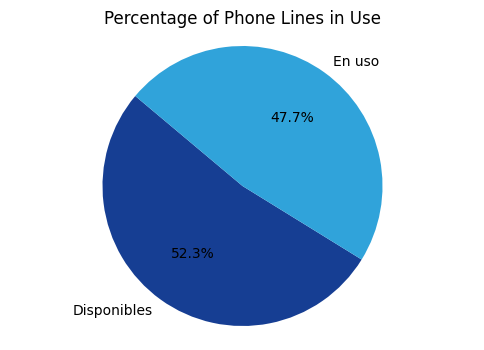

In [34]:
# Vamos a graficar un pie chart para evidenciar el grado de utilizacion de los vru
data = {'Status': ['Disponibles', 'En uso'],
        'Contar': [65 - 31, 31]}
df_vru = pd.DataFrame(data)

# Calculate the percentage of phone lines in use
df_vru['Porcentaje'] = (df_vru['Contar'] / df_vru['Contar'].sum()) * 100

# Define custom colors
colors = ['#163E93', '#30A3DA']

# Plot the pie chart with custom colors
plt.figure(figsize=(6, 4))
plt.pie(df_vru['Porcentaje'], labels=df_vru['Status'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Percentage of Phone Lines in Use')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

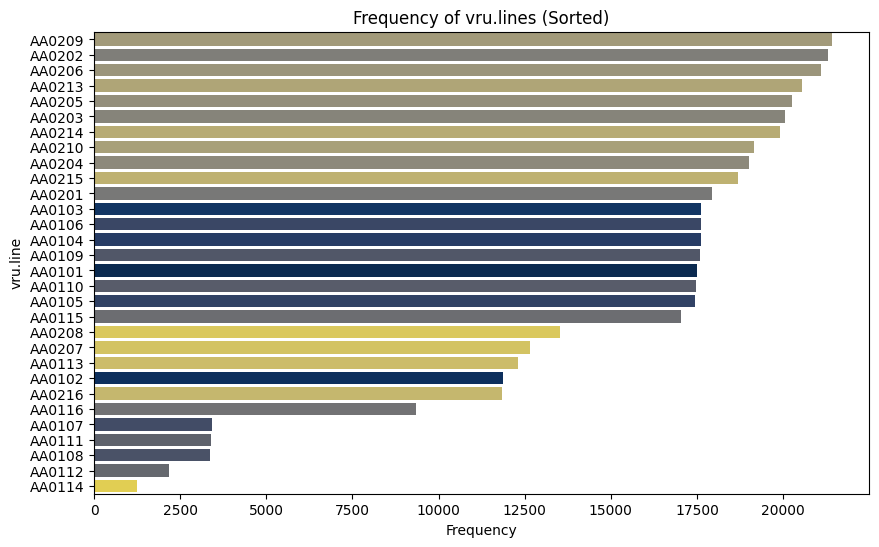

In [35]:
# Mostramos la utilizacion de las 31 vru que si se utilizan, se puede ver que el grado de utilizacion de las mismas no es homogeneo
plt.figure(figsize=(10, 6))
sns.countplot(y='vru.line', data=df, order=df['vru.line'].value_counts().index,hue='vru.line',palette='cividis')
plt.title('Frequency of vru.lines (Sorted)')
plt.xlabel('Frequency')
plt.ylabel('vru.line')
plt.show()

In [36]:
df.head()

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,customer_category
0,AA0101,33116,9664491.0,2,PS,1999-01-01,1999-01-01 00:00:31,1999-01-01 00:00:36,5,1999-01-01 00:00:36,1999-01-01 00:03:09,153,HANG,1999-01-01 00:00:00,1999-01-01 00:00:00,0,NO_SERVER,CustomerIded
1,AA0101,33117,0.0,0,PS,1999-01-01,1999-01-01 00:34:12,1999-01-01 00:34:23,11,1999-01-01 00:00:00,1999-01-01 00:00:00,0,HANG,1999-01-01 00:00:00,1999-01-01 00:00:00,0,NO_SERVER,CustomerNotId
2,AA0101,33118,27997683.0,2,PS,1999-01-01,1999-01-01 06:55:20,1999-01-01 06:55:26,6,1999-01-01 06:55:26,1999-01-01 06:55:43,17,AGENT,1999-01-01 06:55:43,1999-01-01 06:56:37,54,MICHAL,CustomerIded
3,AA0101,33119,0.0,0,PS,1999-01-01,1999-01-01 07:41:16,1999-01-01 07:41:26,10,1999-01-01 00:00:00,1999-01-01 00:00:00,0,AGENT,1999-01-01 07:41:25,1999-01-01 07:44:53,208,BASCH,CustomerNotId
4,AA0101,33120,0.0,0,PS,1999-01-01,1999-01-01 08:03:14,1999-01-01 08:03:24,10,1999-01-01 00:00:00,1999-01-01 00:00:00,0,AGENT,1999-01-01 08:03:23,1999-01-01 08:05:10,107,MICHAL,CustomerNotId


## 3.3.3 customer_id
En este punto, durante el analisis del dataset pudimos detectar una oportunidad sobre la performance del callcenter en cuanto al proceso de identificacion de los clientes al momento de la recepcion de la llamada.<br>
- **Prospectos de Clientes** deberian ser los que tengan type == 'NW' customer_id == 0 <br>
    - El _0 solo deberia utilizarse para aquellas llamadas de prospectos de clientes_. <br>
    - Usando 'type' como identificador, concluimos que son 67.728 en total las llamados recibidas correspondientes a clientes potenciales.
    - Esto es el *15% del total de los llamados*

-   El **53% de los valores es cero** = 234.552 registros de un total de 444.443<br>
    - **Esto es 53% de las llamadas recibidas no identifican al cliente**
    - Descontando los prospectos de clientes de este total, se identifican **unos 167.440 clientes sin identificar**.
    - Pero por el tipo de operaciones que realizan se confirma que corresponden a clientes regulares o prioritarios que sin ser identificados reciben un servicio que pudiera no ser el contratado.
    - Si consideramos constante la distribucion de clientes prioritarios y regulares en esta cantidad, podemos inferir que:
        -   Ingresan al servicio unos 108.836 clientes prioritarios sin ser identificados, **alrededor del 24% del total de las llamadas recibidas**
        -   Ingresan al servicio unos 56.930 clientes regulares sin ser identificados,  **alrededor del 13% del total de las llamadas recibidas**
        
    ### Oportunidades detectadas
    > Con lo que concluimos que se presenta una gran oportunidad de mejora en este aspecto, ya que mas alla de la clasificacion de la prioridad, que viene como consecuencia de la identifcacion del cliente y su actualizacion, podemos estar teniendo clientes prioritarios ingresando a nuestra cola de llamados sin identificar que estan recibiendo un servicio inferior al contratado.


In [37]:
cantidad_unicos_customer_category = df['customer_category'].nunique() # method returns an array of unique values in the specified column.
print(cantidad_unicos_customer_category)
# Agrupamos por cantidad para cada valor de la serie
value_counts = df['customer_category'].value_counts()
value_counts

3


customer_category
CustomerIded         209565
CustomerNotId        167150
Prospect_Customer     67728
Name: count, dtype: int64

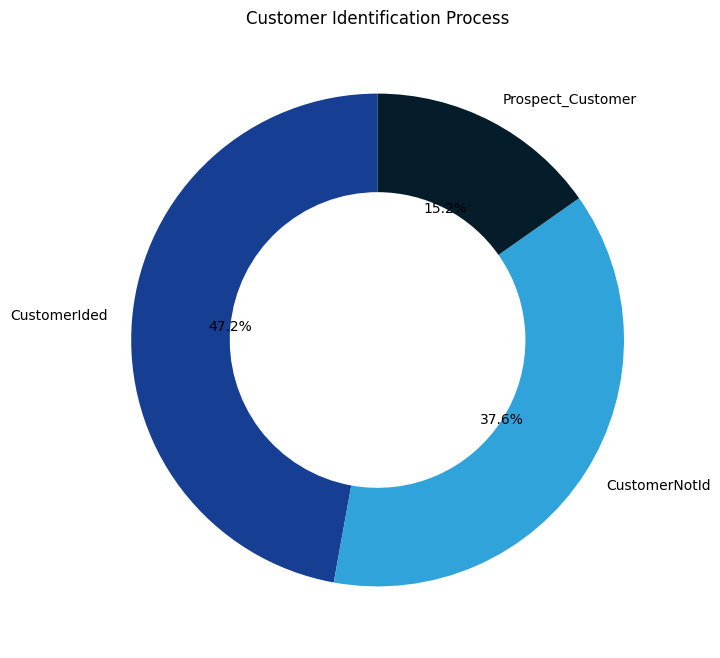

In [38]:
# # Agrupamos por cantidad para cada valor de la serie customer_id
customer_id_counts = df['customer_category'].value_counts()

# Mckinsey-inspired colors
colors = ['#163E93','#30A3DA','#051C2A','#060200','#FFFFFF']

# Create a pie chart using the Mackinsley-inspired colors
plt.figure(figsize=(8, 8))
plt.pie(customer_id_counts, labels=customer_id_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=colors)
plt.title('Customer Identification Process')
plt.show()

## 3.3.4    Priority
La mayor cantidad de llamadas que ingresan no son identificadas por cliente y por lo tanto, sus prioridades tampoco son bien definidas.
Como podemos ver en el grafico debajo:<br>
*   El 53% de las llamadas son prioridad 0, es decir, que segun prioridad serian todos clientes potenciales.<br>
*   Solo el 31% de las llamadas son prioritarias.<br>
*   El 16% son clientes regulares.<br>
Es evidente que hay una gran oportunidad en el sistema de identificacion de los clientes para poder definir prioridades de manera correcta<br> 

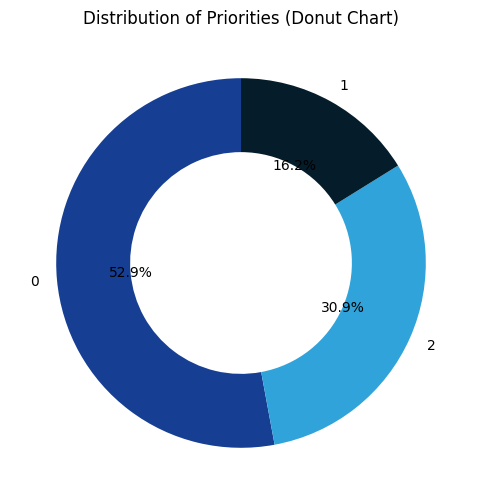

In [39]:
# Get the count of each priority
priority_counts = df['priority'].value_counts()

# Paleta de colores
colors = ['#163E93','#30A3DA','#051C2A','#060200','#FFFFFF']
# Create a donut chart using the pie function with the custom colormap
plt.figure(figsize=(6, 6))
plt.pie(priority_counts, labels=priority_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=colors)
plt.title('Distribution of Priorities (Donut Chart)')
plt.show()

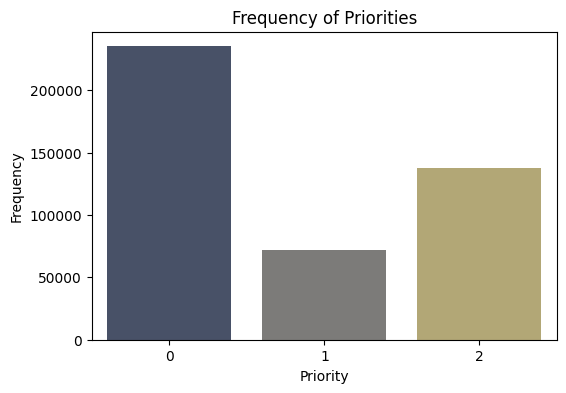

In [40]:
# Graficamos la distribucion de prioridades
unique_priorities = df['priority'].unique()

# Use a palette with the same number of colors as unique priorities
palette = sns.color_palette('cividis', len(unique_priorities))

# Plot the countplot with the adjusted palette
plt.figure(figsize=(6, 4))
sns.countplot(x='priority', data=df, hue='priority', palette='cividis', legend=False)
plt.title('Frequency of Priorities')
plt.xlabel('Priority')
plt.ylabel('Frequency')
plt.show()

## 3.3.5 type
Hay 6 posibles servicios que provee el call center a los clientes que se contactan:<br> 1. PS = Actividad regular<br> 2. PE = Actividad regular en ingles<br> 3. NE = Actividad Acciones <br> 4. IN = Soporte Home-Banking <br> 5. TT = Solicitud de contacto directo del banco <br> 6. NW = Cliente Potencial - informacion <br>

    -   El 68% de los contactos al call center son para resolver actividades regulares (PS).
    -   La segunda actividad del call center en orden de importancia, son los contactos de los prospectos de cliente, 15% de los contactos (NW)
    -   La tercera es suporte sobre Mercado de acciones con el 9% de los contactos.
    -   Por ultimo, solo 5% de los contactos son para recibir soporte para Home-Banking
    -   Y un 3% unicamente solicita que el banco los contacte de manera directa.

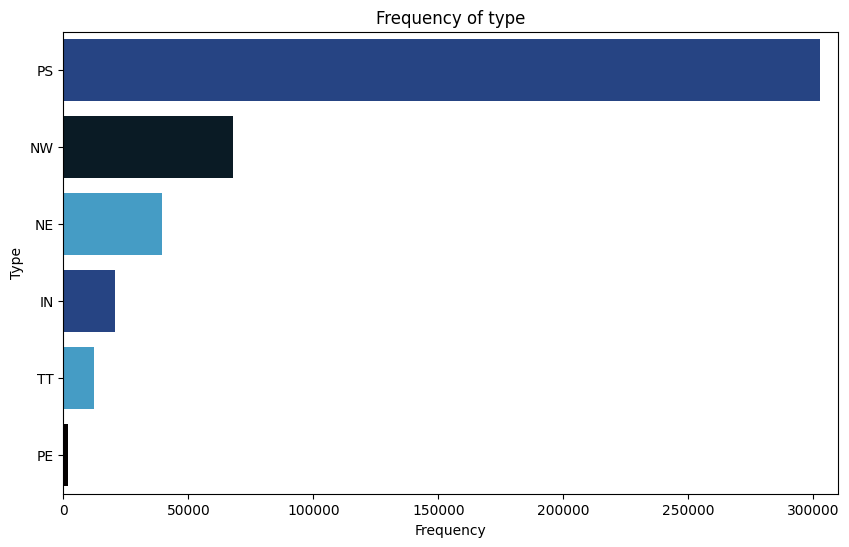

In [41]:
# Paleta de colores
colors = ['#163E93','#30A3DA','#051C2A','#060200','#163E93','#30A3DA']

# Contamos la cantidad para cada tipo
type_counts = df['type'].value_counts()

# Sort the types by frequency in descending order
type_order = type_counts.index

# Graficamos un barplot de Type
plt.figure(figsize=(10, 6))
sns.barplot(y=type_counts.index, x=type_counts.values, order=type_order, palette=colors, hue=type_counts.index, legend=False)
plt.xlim(0, 310000)  # Adjust the upper limit as needed
plt.title('Frequency of type')
plt.xlabel('Frequency')
plt.ylabel('Type')
plt.show()

### 3.1.6 Fecha
Comenzamos con el campo fecha, 'date', en nuestro dataset.<br>
Vamos a comenzar por diferenciar, sumando columnas a nuestro dataset para poder evaluar luego por dias, dias de la semana y meses del año la información. 
<br>
Nuestro dataset, como se vio antes, contiene los registros de una año entero, desde el 1999-01-01 hasta el 1999-12-31.

In [42]:
# Se agrega una nueva columna para el mes
df['mes'] = df['date'].dt.month
df['mes'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [43]:
# Se agrega una nueva columna para el dia
df['dia'] = df['date'].dt.day
df['dia'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 11, 12])

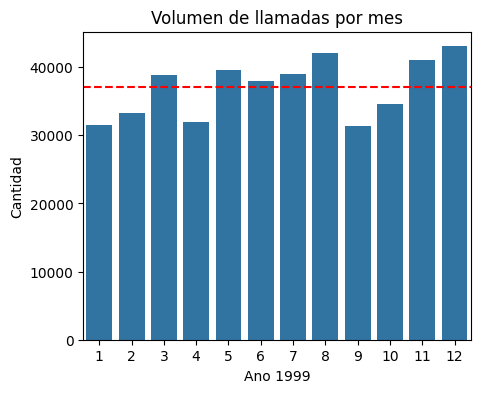

In [44]:
# Calculamos el promedio de llamadas por mes

average_calls_per_month = df['mes'].value_counts().mean()

# Se grafica el volumne de llamadas por mes
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='mes')
# Paleta de colores
colors = ['#163E93','#30A3DA','#051C2A','#060200','#FFFFFF']
# ajustamos las x-axis para mostrar los valores de los meses
# meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
#plt.xticks(ticks=range(12), labels='month', rotation=45)
plt.axhline(y=average_calls_per_month, color='red', linestyle='--', label='Average Calls')
plt.xlabel('Ano 1999')
plt.ylabel('Cantidad')
plt.title('Volumen de llamadas por mes')
plt.show()

<Figure size 1500x800 with 0 Axes>

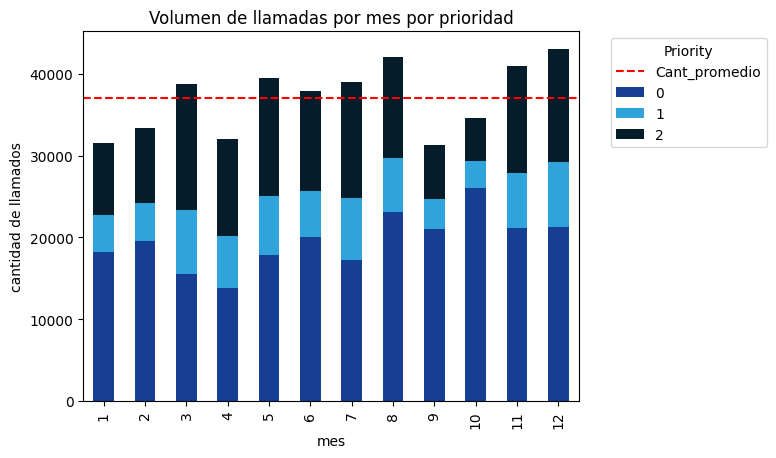

In [45]:
# Agrupamos por mes y prioridad para despues contar el numero de registros
df_counts = df.groupby(['mes', 'priority'],observed=True).size().unstack().fillna(0)

# Calculmos la cantidad de llamadas promedio por mes
average_calls = df.groupby('mes').size().mean()

# Paleta de colores
colors = ['#163E93','#30A3DA','#051C2A','#060200','#FFFFFF']

# Creamos un grafico de columnas apiladas
plt.figure(figsize=(15, 8))
df_counts.plot(kind='bar', stacked=True, color=colors)
plt.title('Volumen de llamadas por mes por prioridad')
plt.xlabel('mes')
plt.ylabel('cantidad de llamados')
plt.axhline(y=average_calls, color='red', linestyle='--', label='Cant_promedio')
plt.legend(title='Priority', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [47]:
# b. Calculamos la distribucion de llamadas por mes
distribution_calls_mes = df.groupby('mes').size()

distribution_calls_mes.describe()

count       12.000000
mean     37036.916667
std       4242.360909
min      31370.000000
25%      33016.750000
50%      38368.000000
75%      39919.500000
max      43065.000000
dtype: float64

Analizando la frecuencia y cantidad de llamadas por mes, podemos ver que la cantidad de llamadas recibidas por mes es bastante constante:
*   El *promedio de llamadas* recibidas por mes es de **37.036 llamadas** y con un desvio estandar de 4.242 llamadas.
*   El mes que mas llamadas se registraron fue *Diciembre* con un total  **43.065 llamadas**
*   El mes que menos llamadas registro fue *Septiembre* con un total de **31.370 llamadas**
*   La **amplitud**  es de *11.695 llamadas*.
*   Los meses de enero, abril y septiembre se registraron bajas en la cantidad de llamadas.
*   Siendo los meses de Agosto, Noviembre y Diciembre el pico de llamadas.

## Analizamos la distribucion de las llamadas por dia
Primero tomamos todos los dias, pero notamos que siendo que el call center funciona con horarios diferentes y servicios diferentes de viernes a domingo esto hace que se distorsionen las medias y los maximos y minimos: 
### Tomando todos los dias de la muestra:
-   La cantidad de llamadas **promedio por dia es de 363 llamadas diarias**
-   *La maxima cantidad de llamadas registradas por dia fue de 3.064 llamadas* 
    -  El dia con mayor cantidad de llamadas ingresadas fue: 1999-05-23 con 3064 llamadas
-   **La mininma cantidad de llamadas en un dia fueron 14 llamadas**
    -   El dia con menor cantidad de llamadas ingresadas fue: 1999-05-21 con 14 llamadas

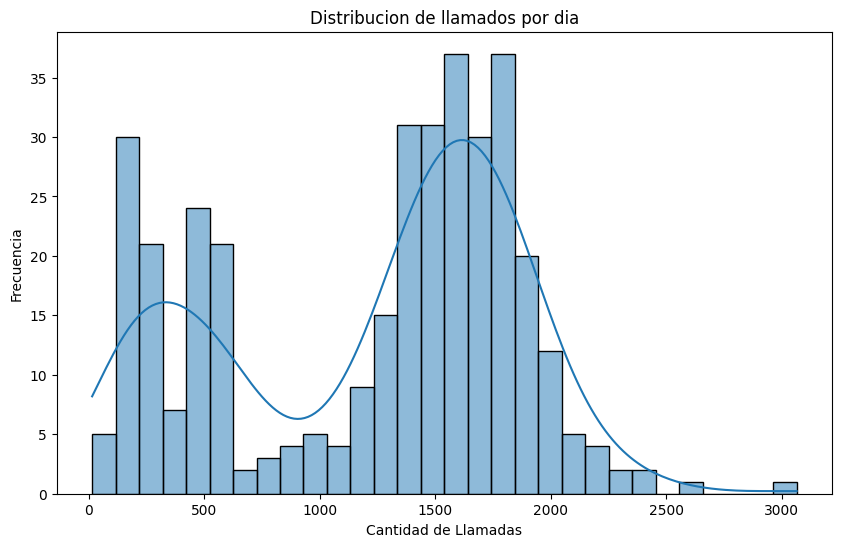

In [48]:
# a. Calculamos la distribucion de llamadas por dia
llamadas_por_dia_lu_a_dom_df = df.groupby(df['date'].dt.date).size()

# Graficamos la informacion
plt.figure(figsize=(10, 6))
sns.histplot(llamadas_por_dia_lu_a_dom_df, bins=30, kde=True)
plt.title('Distribucion de llamados por dia')
plt.xlabel('Cantidad de Llamadas')
plt.ylabel('Frecuencia')
plt.show()

In [49]:
llamadas_por_dia_lu_a_dom_df.describe()

count     363.000000
mean     1224.360882
std       642.844356
min        14.000000
25%       546.000000
50%      1443.000000
75%      1713.000000
max      3064.000000
dtype: float64

## Analizamos la distribucion de las llamadas por dia de Lunes a Jueves
Ahora podemos ver que las colas anteriores se eliminan y la distribucion aparenta normal:<br>
    *   Llamadas *promedio por dia* (excluyendo Vie-Dom): **1544.90 llamadas diarias**<br>
    *   La *media de esta distribucion: 1544.90 llamadas*<br>
    *   El **Desvio Estandard: 367.64**<br>
*   El dia con *mayor cantidad de llamadas ingresadas fue: 1999-08-02 con 2363 llamadas*<br>
*   El dia con *menor cantidad de llamadas ingresadas fue: 1999-04-06 con 89 llamadas*<br>

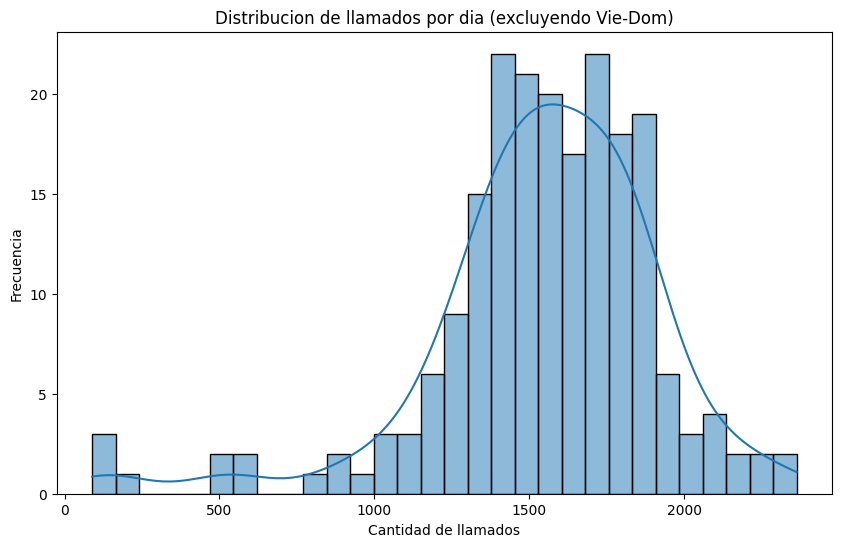

In [50]:
# Excluimos los dias Viernes, Sabado y Domingo (0=Monday, 1=Tuesday, ..., 6=Sunday)
lunes_a_jueves_df = df[df['date'].dt.dayofweek < 4]

# a. Calculamos la distribucion de llamadas por dia
llamadas_por_dia_lu_a_jue = lunes_a_jueves_df.groupby(lunes_a_jueves_df['date'].dt.date).size()

# Graficamos 
plt.figure(figsize=(10, 6))
sns.histplot(llamadas_por_dia_lu_a_jue, bins=30, kde=True)
plt.title('Distribucion de llamados por dia (excluyendo Vie-Dom)')
plt.xlabel('Cantidad de llamados')
plt.ylabel('Frecuencia')
plt.show()

In [51]:
llamadas_por_dia_lu_a_jue.describe()


count     206.000000
mean     1544.902913
std       367.643438
min        89.000000
25%      1387.750000
50%      1567.000000
75%      1779.000000
max      2363.000000
dtype: float64

### Comparamos ambas distribuciones

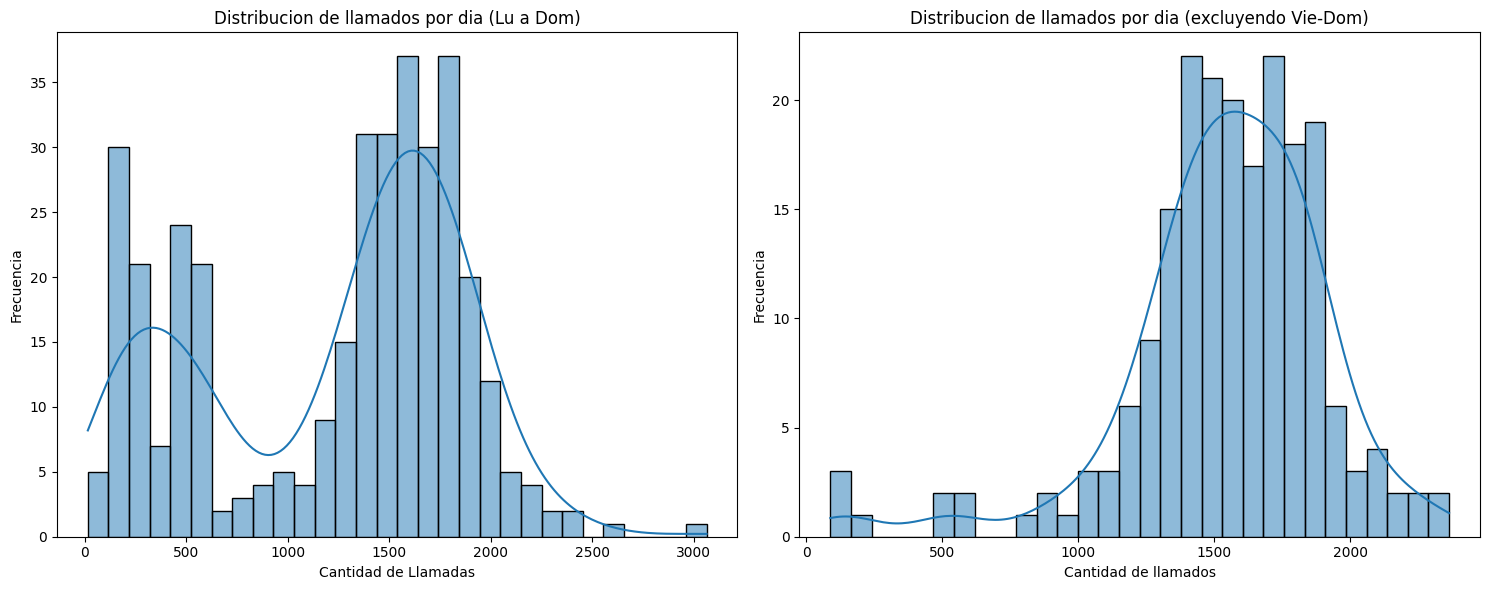

In [52]:
# Graficamos la informacion (Monday to Sunday)
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)  # Subplot with 1 row, 2 columns, and index 1
sns.histplot(llamadas_por_dia_lu_a_dom_df, bins=30, kde=True)
plt.title('Distribucion de llamados por dia (Lu a Dom)')
plt.xlabel('Cantidad de Llamadas')
plt.ylabel('Frecuencia')

# Graficamos (Monday to Thursday)
plt.subplot(1, 2, 2)  # Subplot with 1 row, 2 columns, and index 2
sns.histplot(llamadas_por_dia_lu_a_jue, bins=30, kde=True)
plt.title('Distribucion de llamados por dia (excluyendo Vie-Dom)')
plt.xlabel('Cantidad de llamados')
plt.ylabel('Frecuencia')

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

In [53]:
# Create DataFrames for descriptive statistics
df_lu_a_jue_desc = llamadas_por_dia_lu_a_jue.describe()
df_lu_a_dom_desc = llamadas_por_dia_lu_a_dom_df.describe()

# Concatenate the two DataFrames vertically to compare
df_comparison = pd.concat([df_lu_a_jue_desc, df_lu_a_dom_desc], axis=1)
df_comparison.columns = ['Monday to Thursday', 'Monday to Sunday']

# Display the pivot table
print(df_comparison)

       Monday to Thursday  Monday to Sunday
count          206.000000        363.000000
mean          1544.902913       1224.360882
std            367.643438        642.844356
min             89.000000         14.000000
25%           1387.750000        546.000000
50%           1567.000000       1443.000000
75%           1779.000000       1713.000000
max           2363.000000       3064.000000


# Comparación entre llamados_Lunes_a_Domingo y llamados_lunes_a_jueves
Medir la frecuencia de llamados de lunes a jueves nos da una media y desvios mas consistentes para analizar lo que es el volumen de llamados y el nivel de actividad del callcenter ya que los dias viernes a domingo el call center trabaja en otros horarios y formas, haciendo que las medidas como la media y el desvio estandar se modifiquen sin sentido.<br>
Asi podemos ver realmente cuales son los volumenes de llamadas diarias ya sea para medir el real nivel de actividad o el caudal de llamadas a atender diariamente.<br>
*   La cantidad de llamadas maximas que se reciben al dia es de 2363 llamadas<br>
*   La cantidad minima que se llegaron a recibir por dia fue de 89 llamadas<br>
*   Y la media es de 1544 llamadas al dia, es decir, que el rango de llamadas es de 2363 a 89 llamadas por dia.<br>

Esto nos permite una medida mas aproximada del volumen de llamadso real, y que sirve para poder contextualizar el nivel de actividad del call center e incluso evaluar su dimensionamiento alineado con los objetivos del Banco<br>

## 3.1.7  vru_entry 
Revisamos la distribucion de los llamados por horario para detectar picos de demanda y relacionarla luego con los tiempos en cola y si tuvieran a su vez incidencia en el resutado (outcome) de la interaccion del cliente con el call center.

### Empezaremos por analizar los datos en vru_entry:
*   La cantidad maxima de llamadas recibidia se produce a las 10 hs  y otro pico de demanda menor a las 15 hs
*   La hora con *mayor cantidad de llamadas ingresadas fue: 10 hs*
*   La hora con *menor cantidad de llamadas ingresadas fue a las 15 hs*

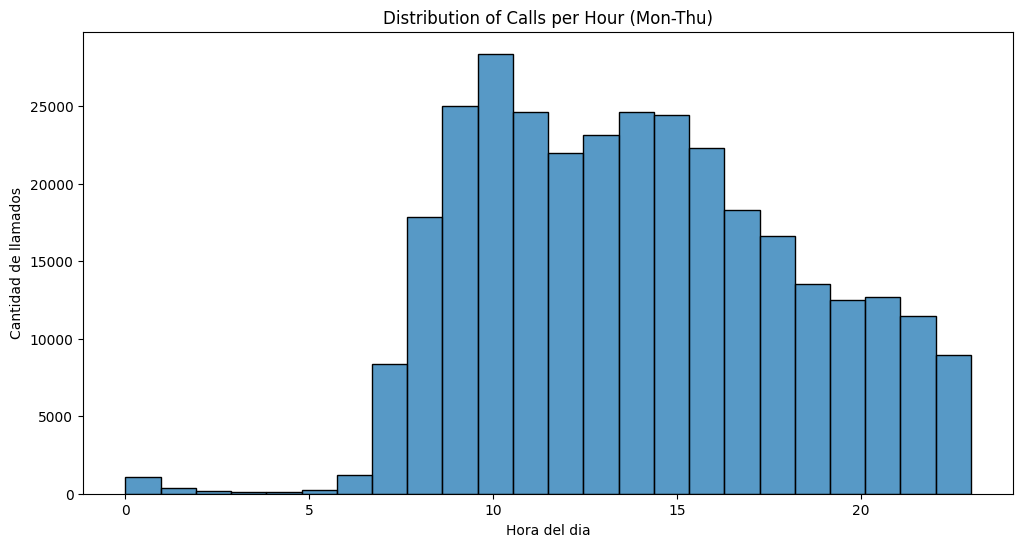

In [54]:
# Filtramos de Lunes a Jueves nuevamente
weekday_df = df[(df['date'].dt.dayofweek >= 0) & (df['date'].dt.dayofweek <= 3)].copy()

# Extraemos la hora de 'vru_entry'
weekday_df['hour'] = weekday_df['vru_entry'].dt.hour

# b. Calculamos la distribucion de las llamadas ingresadas por hora
distribution_calls_per_hour = weekday_df.groupby('hour').size()

# Plot histogram
plt.figure(figsize=(12, 6))
sns.histplot(weekday_df['hour'], bins=24, kde=False)
plt.title('Distribution of Calls per Hour (Mon-Thu)')
plt.xlabel('Hora del dia')
plt.ylabel('Cantidad de llamados')
plt.show()

In [55]:
# Mostramos las estadísticas descriptivas de la distribución
print(distribution_calls_per_hour.describe())

count       24.000000
mean     13260.416667
std       9905.542366
min         99.000000
25%       1189.000000
50%      13103.000000
75%      22511.500000
max      28393.000000
dtype: float64


In [56]:
# creamos una tabla pivot para poder ver la distribucion de llamadas por hora por dia
pivot_table = weekday_df.pivot_table(index='hour', columns=weekday_df['date'].dt.dayofweek, aggfunc='size')

# Renombramos las columnas 
day_names = ['Lunes', 'Martes', 'Miercoles', 'Jueves']
pivot_table.columns = day_names

# Display the pivot table
print(pivot_table)


      Lunes  Martes  Miercoles  Jueves
hour                                  
0       267     267        253     273
1       112      87        102      77
2        49      55         46      51
3        28      19         34      18
4        23      24         34      26
5        78      68         54      56
6       364     285        306     277
7      2466    1987       1951    1982
8      4547    4511       4434    4383
9      6443    6193       6250    6134
10     7169    7229       6805    7190
11     6166    6158       6065    6263
12     5374    5533       5428    5650
13     5467    5725       6291    5654
14     6208    6111       6070    6270
15     6024    6172       6032    6195
16     4764    6208       4729    6602
17     3912    5124       4052    5209
18     4203    4378       4083    3967
19     3621    3338       3490    3082
20     3408    3059       3018    3028
21     3348    3195       3244    2888
22     3028    3100       2897    2436
23     2428    2367      

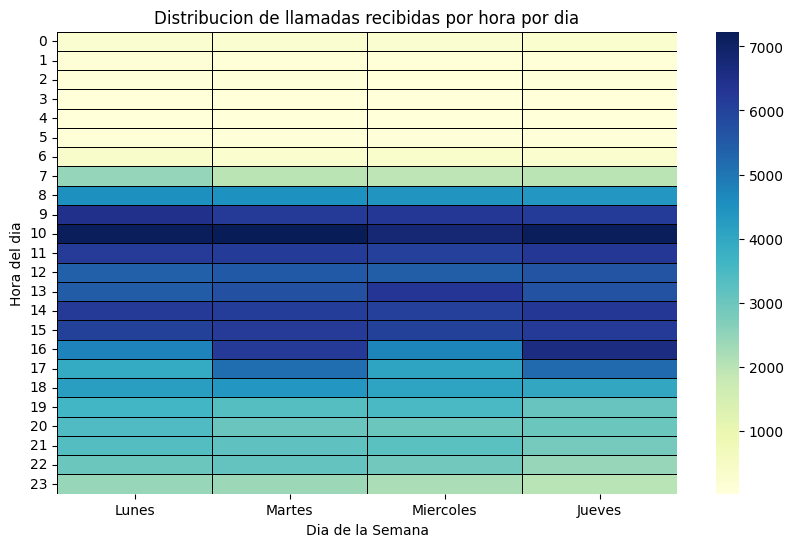

In [57]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="YlGnBu", linewidths=0.5, linecolor='black')
plt.title('Distribucion de llamadas recibidas por hora por dia')
plt.xlabel('Dia de la Semana')
plt.ylabel('Hora del dia')
plt.yticks(rotation=0)
plt.show()

# Análisis
*   Podemos ver que para todos los dias de Lunes a Jueves, los picos de demanda se repiten en los horarios de 10hs a 15 hs. para todos los dias de manera consistente.<br>
*   Podemos afirmar que estos son los picos de demanda, y que luego de las 15hs se mantiene elevada la actividad del call center<br>
*   Ademas podemos decir, que en las franjas iniciales de actividad de 7 am a 10am, y luego en la franja posterior al pico de las 15hs, de 17 a 22hs el nivel de actividad es bastante constante.


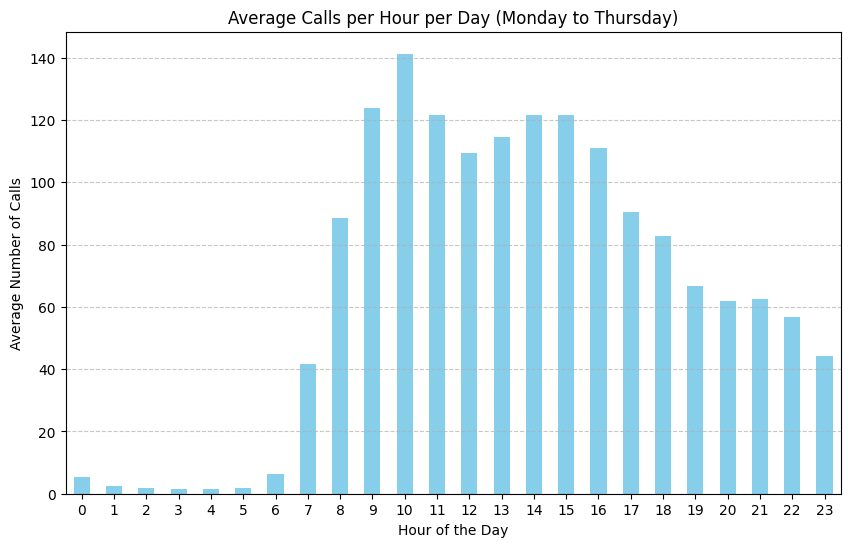

In [58]:
# Calculate the average number of calls per hour per day
average_calls_per_hour_per_day = weekday_df.groupby(['date', 'hour']).size().groupby('hour').mean()

# Plot the average calls per hour per day
plt.figure(figsize=(10, 6))
average_calls_per_hour_per_day.plot(kind='bar', color='skyblue')
plt.title('Average Calls per Hour per Day (Monday to Thursday)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Calls')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Resumen
Se ve claramente que los picos se repiten para todos los dias, de lunes a jueves;
* El **maximo** de llamadas por hora que se ha registrado es de **141 llamadas en la misma hora**
* El **minimo** de llamadas recibidas en una hora es de **2 llamadas**
* El **promedio de llamadas por hora es de 65 llamadas**.
* El **75%** de las veces se reciben menos de **111 llamadas por hora**

## 3.1.8 vru_exit
Revisamos la distribución de la salidad del vru de los llamados por horario para detectar picos de demanda y relacionarla luego con los tiempos en cola y si tuvieran a su vez incidencia en el resutado (outcome) de la interacción del cliente con el call center.

### Empezaremos por analizar los datos en vru_exit:
*   La cantidad máxima de llamadas recibidas se produce a las 10 hs  y otro pico de demanda menor a las 15 hs
*   La hora con *mayor cantidad de llamadas ingresadas fue: 10 hs*
*   La hora con *menor cantidad de llamadas ingresadas fue a las 15 hs*
*   Si bien la media es de 13.260 llamados por hora, desde las 10am hasta las 18hs el caudal de llamadas es superior a la media. 
*   En el pico de demanda de las 10hs el caudal de llamadas entrantes es mas del doble que la media.
*   Mas adelante, cuando analicemos el q_time analizaremos la correlación entre la variable llamadas entrantes por hora por dia versus el tiempo de espera en cola. 

In [59]:
# b. Calculamos la distribucion de las llamadas ingresadas por hora
distribution_calls_per_hour.describe()

count       24.000000
mean     13260.416667
std       9905.542366
min         99.000000
25%       1189.000000
50%      13103.000000
75%      22511.500000
max      28393.000000
dtype: float64

In [60]:
# Filtramos de Lunes a Jueves nuevamente
weekday_df = df[(df['date'].dt.dayofweek >= 0) & (df['date'].dt.dayofweek <= 3)].copy()

# Extraemos la hora de 'vru_exit'
weekday_df['hour'] = weekday_df['vru_exit'].dt.hour

# b. Calculamos la distribucion de las llamadas ingresadas por hora
distribution_calls_per_hour = weekday_df.groupby('hour').size()

# a. Calculamos el maximo de llamadas ingresadas por hora
max_per_hour = distribution_calls_per_hour.max()

# el valor maximo se registro en la hora
max_hour = distribution_calls_per_hour.idxmax()

# Visualizamos la informacion
print(f"La hora con mayor cantidad de llamadas ingresadas fue: {max_hour} con {max_per_hour} llamadas")

# a. Calculamos el minimo de llamadas ingresadas por hora
min_per_hour = distribution_calls_per_hour.min()

# el valor maximo se registro en la hora
min_hour = distribution_calls_per_hour.idxmin()

# Visualizamos la informacion
print(f"La hora con menor cantidad de llamadas ingresadas fue: {min_hour} con {min_per_hour} llamadas")

La hora con mayor cantidad de llamadas ingresadas fue: 10 con 28397 llamadas
La hora con menor cantidad de llamadas ingresadas fue: 3 con 101 llamadas


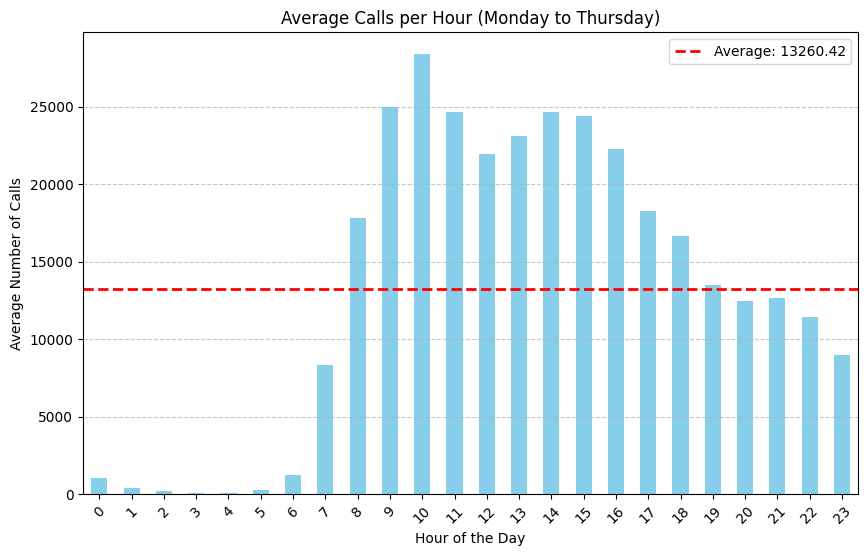

In [61]:
# Agrupamos por hora y calculamos el promedio de llamadas
average_calls_per_hour = weekday_df.groupby('hour').size().mean()

# Graficamos el promedio de llamadas por hora
plt.figure(figsize=(10, 6))
weekday_df.groupby('hour').size().plot(kind='bar', color='skyblue')
plt.title('Average Calls per Hour (Monday to Thursday)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Calls')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(average_calls_per_hour, color='red', linestyle='--', linewidth=2, label=f'Average: {average_calls_per_hour:.2f}')
plt.legend()
plt.show()

## 3.3.9 vru_time
Antes de analizar en detalle vru_time, vemos que hay un problema con la informacion de esta columna.
El valor minimo es -362 segundos, lo cual no es posible.
Revisamos cuantos valores negativos tenemos en este registro:
-   Se encontraron 350 registros con valores negativos, esto es menos del 1% de los registros.
-   viendolos en detalle podemos inferir que se invirtieron las horas de salida por las de entrada, podemos bien eliminar estos registros o corregirlos asumiendo que este error fuera posible.

In [62]:
df['vru_time'].describe()

count    444443.000000
mean         10.285917
std          34.942273
min        -362.000000
25%           6.000000
50%           8.000000
75%          10.000000
max        4832.000000
Name: vru_time, dtype: float64

In [63]:
# Se cuentan los valores negativos
neg_count = (df['vru_time'] < 0).sum()
perc_neg = round(neg_count/df['vru_time'].count()*100, 2)
print('Cantidad de valores negativos: ', neg_count)
print('Porcentaje sobre el total:', perc_neg, '%')

Cantidad de valores negativos:  350
Porcentaje sobre el total: 0.08 %


Revisando los datos parecerían estar invertidos los datos de vru_entry y vru_exit.

Se crean nuevas columnas donde se corrigen estas horas y se recalculan los tiempos de espera.


In [64]:
df['vru_entry_corr'] = np.where(df['vru_entry'] > df['vru_exit'], df['vru_exit'], df['vru_entry'])
df['vru_exit_corr'] = np.where(df['vru_entry'] > df['vru_exit'], df['vru_entry'], df['vru_exit'])
df['vru_time_corr'] = (df['vru_exit_corr'] - df['vru_entry_corr']).dt.total_seconds()
df['vru_time_corr'] = df['vru_time_corr'].astype('int64')

# Se verifican los cambios
df['vru_time_corr'].describe()

count    444443.000000
mean         10.396195
std          34.909622
min           0.000000
25%           6.000000
50%           8.000000
75%          10.000000
max        4832.000000
Name: vru_time_corr, dtype: float64

In [65]:
# copiamos la columna vru_time_corr en vru_time y luego eliminamos la columna vru_time_corr:
df['vru_time'] = df['vru_time_corr']
df.drop('vru_time_corr',axis=1,inplace=True)

Con los valores corregidos vamos a analizar este campo para detectar outliers:

count    444443.000000
mean         10.396195
std          34.909622
min           0.000000
25%           6.000000
50%           8.000000
75%          10.000000
max        4832.000000
Name: vru_time, dtype: float64


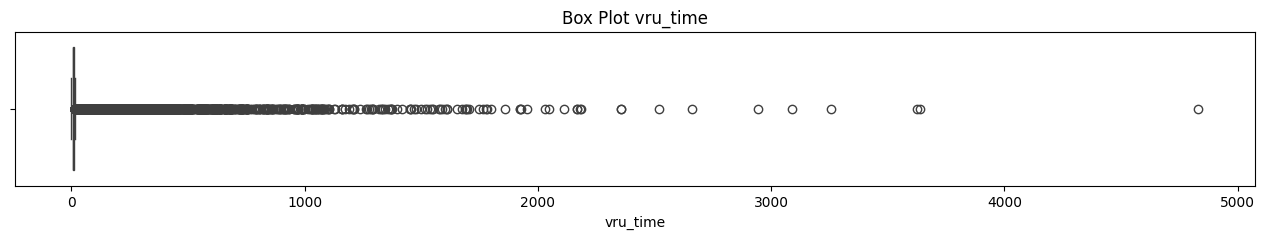

In [66]:
# Display summary statistics
print(df['vru_time'].describe())

# Create a box plot
plt.figure(figsize=(16, 2))
sns.boxplot(x=df['vru_time'])
plt.title('Box Plot vru_time')
plt.xlabel('vru_time')
plt.show()

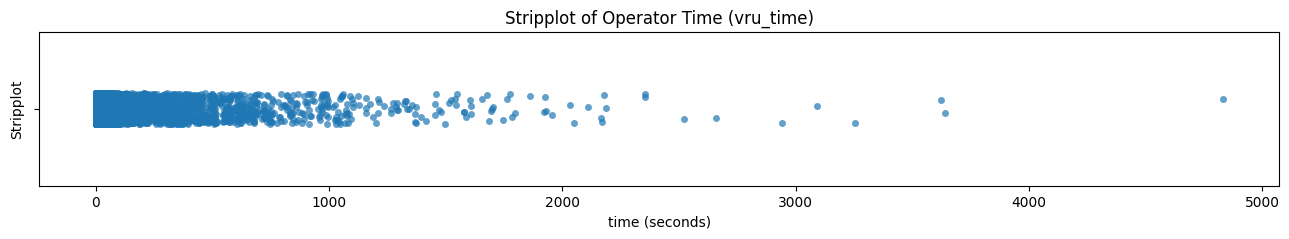

In [67]:
# Create a strip plot
plt.figure(figsize=(16, 2))
sns.stripplot(data=df, x='vru_time', jitter=True, alpha=0.7)
plt.xlabel('time (seconds)')
plt.ylabel('Stripplot')
plt.title('Stripplot of Operator Time (vru_time)')
plt.show()

Text(0.5, 1.0, 'Zoomed Boxplot for Values < 30 seconds')

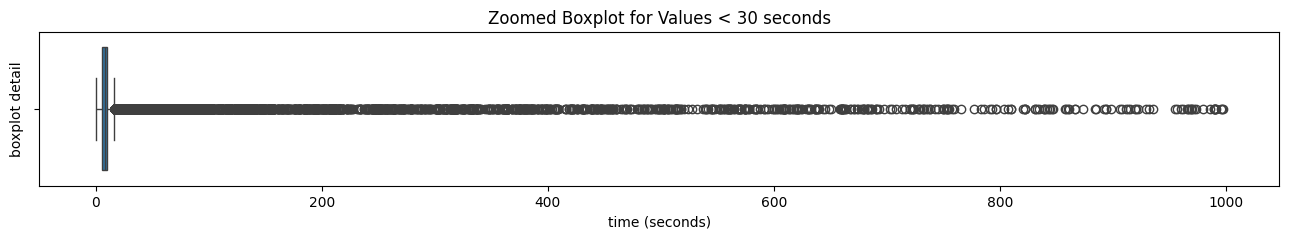

In [68]:
# Create a box plot
plt.figure(figsize=(16,2))
sns.boxplot(data=df[df['vru_time'] < 1000], x='vru_time')
plt.xlabel('time (seconds)')
plt.ylabel('boxplot detail')
plt.title('Zoomed Boxplot for Values < 30 seconds')

In [69]:
outlier_count = (df['vru_time'] > 16).sum()
perc_outlier = round(outlier_count/df['vru_time'].count()*100,2)
print('Cantidad de valores outlier sobre 16 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 16 segundos:  26651
Porcentaje sobre el total: 6.0 %


In [70]:
outlier_count = (df['vru_time'] > 1000).sum()
perc_outlier = round(outlier_count/df['vru_time'].count()*100,2)
print('Cantidad de valores outlier sobre 1000 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 1000 segundos:  110
Porcentaje sobre el total: 0.02 %


### Conclusiones
*   Los tiempos entre que una llamada es recepcionada y asignada al VRU correspondiente tiene una duracion *promedio de 10 segundos*.
*   El valor *maximo es de unos 4832 segundos (80 minutos)*.
*   El *valor minimo es 0 segundos*
*   El *75%* de las llamadas son enviadas a cola **en menos de 10 segundos. Esto es 333.250 llamados.**

*   Analizando las graficas de los *Boxplots y la dispersion y los calculos de los outliers* vemos que:
    -   hay 26.333 llamadas con tiempos mayores a los 16 segundos, representando alrededor del 6% de todos los registros. Estos registros podrian ser considerados **atipicos** o desvios.
    -   Tiempos entre  los *16 segundos y hasta 1000 segundos (aproximadamente 16 minutos), se considerarian normales*.
    -   De esta forma, podriamos clasificar como outliers solamente 110 llamadas, que representan el 0.02% del total de los llamados recibidos.
    -   procedemos a eliminar estos registros.      

In [71]:
df = df[df['vru_time'] <=1000]
(df['vru_time'] > 1000).sum()

0

In [72]:
df['vru_time'].describe()

count    444333.000000
mean         10.013888
std          23.049743
min           0.000000
25%           6.000000
50%           8.000000
75%          10.000000
max         997.000000
Name: vru_time, dtype: float64

Frequency Distribution of vru_time:
vru_time
0      8696
1      1708
2      6568
3      1797
4      1934
       ... 
990       3
991       1
995       1
996       1
997       1
Name: count, Length: 648, dtype: int64


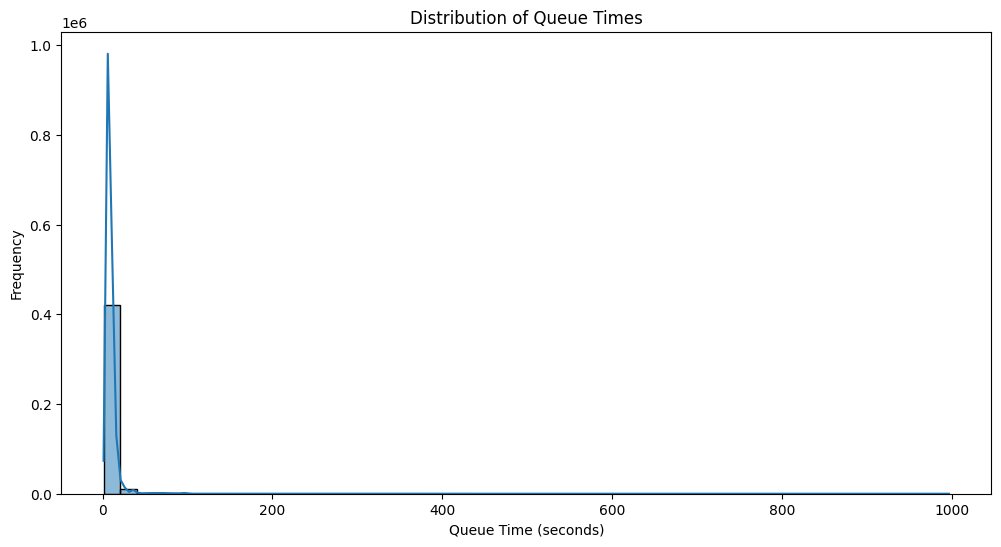

In [73]:
# Display frequency distribution
frequency_distribution = df['vru_time'].value_counts().sort_index()
print("Frequency Distribution of vru_time:")
print(frequency_distribution)
# Filter out calls with q_time == 0
valid_calls = df[df['vru_time'] > 0]

# Plot the histogram
plt.figure(figsize=(12, 6))
sns.histplot(valid_calls['vru_time'], bins=50, kde=True)
plt.title('Distribution of Queue Times')
plt.xlabel('Queue Time (seconds)')
plt.ylabel('Frequency')
plt.show()

## 3.3.10 q_start y 3.3.11 q_exit
Vamos a analizar estas dos variables juntas, ya que como vimos en la variable anterior (vru_time) ambas estan relacionadas ya que ocurren en cascada.

Revisamos la distribución de los llamados por horario para detectar picos de demanda y relacionarla luego con los tiempos en cola y si tuvieran a su vez incidencia en el resutado (outcome) de la interaccion del cliente con el call center, o la tasa de abandono.

### Empezaremos por analizar los datos en q_start:
Como es de esperarse, ya que lo anticipamos con el análisis del vru_entry, vru_exit y vru_time:
*   La cantidad máxima de llamadas recibidia se produce a las 10 hs  y otro pico de demanda menor a las 15 hs
*   La hora con *mayor cantidad de llamadas ingresadas fue: 10 hs*
*   La hora con *menor cantidad de llamadas ingresadas fue a las 15 hs*

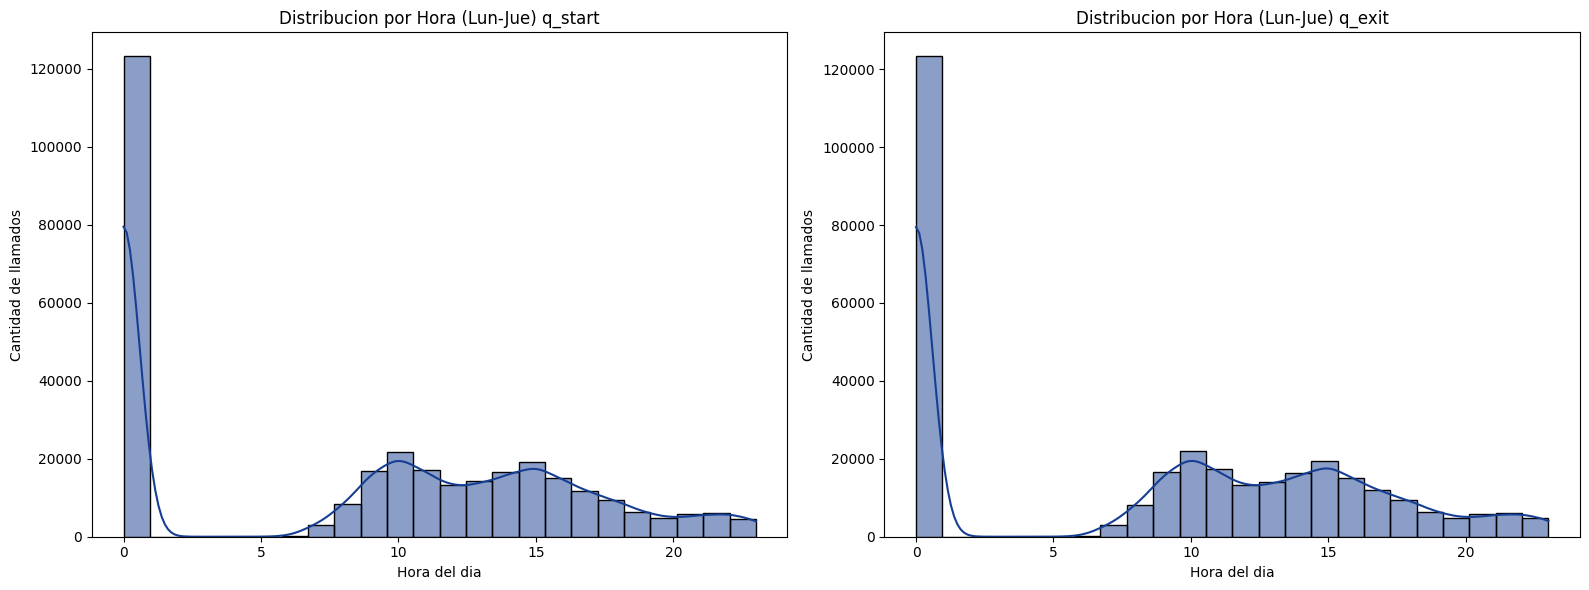

In [74]:
# Extraemos la hora de 'q_start' y de 'q_exit'
weekday_df['q_start_hour'] = weekday_df['q_start'].dt.hour
weekday_df['q_exit_hour'] = weekday_df['q_exit'].dt.hour

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot the distribution of time at which calls enter the queue
sns.histplot(weekday_df['q_start_hour'], bins=24, kde=True, color='#163E93', ax=axes[0])
axes[0].set_title('Distribucion por Hora (Lun-Jue) q_start')
axes[0].set_xlabel('Hora del dia')
axes[0].set_ylabel('Cantidad de llamados')

# Plot the distribution of time at which calls exit the queue
sns.histplot(weekday_df['q_exit_hour'], bins=24, kde=True, color='#163E93', ax=axes[1])
axes[1].set_title('Distribucion por Hora (Lun-Jue) q_exit')
axes[1].set_xlabel('Hora del dia')
axes[1].set_ylabel('Cantidad de llamados')

plt.tight_layout()
plt.show()

## Tasa de Abandono
Por lo visto anteriormente, la tasa de abandono aparenta muy alta porque del total de llamadas recibidas, solo el 60% se terminan atendiendo y el 40% abandona luego de contactarse con el call center.
El Banco tiene como objetivo que todos los servicios definidos en el scope del Call Center sean atendidos por el mismo. <br>
<br>
Para poder profundizar el análisis los abandonos sería interesante poder  revisar y analizar estos registros en detalle para poder evidenciar relaciones o causalidades para esta **alta tasa de abandono**<br>   
*   Analizar que porcentaje de estos registros corresponde a clientes identificados<br>
*   Analizar que porcentaje de estos registros corresponde a clientes NO identificados<br>
*   Analizar que porcentaje de estos registros corresponde a Prospectos clientes<br>
*   Si los tiempos de espera en el VRU son altos para ellos o cual es el promedio<br>

In [75]:
# Filtramos a los clientes que abandonan en q_entry == '00:00:00'
abandonan_q_start = df[df['q_start'].dt.time == pd.to_datetime('00:00:00').time()] # 180.734 rows

# Cuantos son los que abandonan
cant_abandonan_q_start = abandonan_q_start['call_id'].count()
cantidad_total = df['call_id'].count()
# cual es el porcentaje del total
porcentaje_abandono = round(((cant_abandonan_q_start)/(cantidad_total)*100),0)

print('los que abandonan en q_entry son :', cant_abandonan_q_start)
print('estos representan el: ', porcentaje_abandono,'% del total')

los que abandonan en q_entry son : 180734
estos representan el:  41.0 % del total


Como se indica en la descripción del DataSet proporcionada, los clientes que abandonan la cola de espera luego del VRU aparecen con un q_start igual a 00:00:00. <br>

*   Analizando estas dos variables vemos **180.739 clientes llegan a ponerse en la cola y abadonan la llamada estando en el VRU** <br> 
*   *Esto representa el 41% de las llamadas que ingresan.*<br>
*   **Por lo que solo el 59% de las llamadas recibidas avanzan en el proceso del call center**<br>

Hasta aca, es lo que esta detallado en la documentación del dataset.<br>
Pero analizándolo en detalle encontramos que un gran porcentaje de estos llamados clasificados como abandonos luego tienen outcome distinto de HANG y tienen tiempos de servicio y type. <br>
De esto podemos concluir que la docuemntación del dataset es erronea. Vamos a corregirlo y vamos a re clasificar los abandonos según esta nueva información<br>

# Calculamos la Tasa de Abandono real

In [78]:
# Abandonan en q_entry
abandonan_q = df[(df['q_start'].dt.time == pd.to_datetime('00:00:00').time()) & (df['ser_start'].dt.time == pd.to_datetime('00:00:00').time())]  # 23.828 rows
cant_abandonan_q = abandonan_q['call_id'].count()
porcentaje_abandono_q = round((cant_abandonan_q / cantidad_total) * 100, 0)

# Abandonan en ser_entry
cant_abandonan_ser= df[(df['q_start'].dt.time != pd.to_datetime('00:00:00').time()) & (df['ser_start'].dt.time == pd.to_datetime('00:00:00').time())]['call_id'].count() # 63210
porcentaje_abandonan_ser = round(((cant_abandonan_ser)/(cantidad_total)*100),0)

print('Cantidad de llamadas totales:', cantidad_total)
print('Cantidad de llamadas que abandonan en q:', cant_abandonan_q)
print('Porcentaje de llamadas que abandonan en q:', porcentaje_abandono_q, '%')
print('Cantidad de llamadas que abandonan en ser:',cant_abandonan_ser)
print('Porcentaje de llamadas que abandonan en ser:', porcentaje_abandonan_ser,'%')

Cantidad de llamadas totales: 444333
Cantidad de llamadas que abandonan en q: 23828
Porcentaje de llamadas que abandonan en q: 5.0 %
Cantidad de llamadas que abandonan en ser: 63210
Porcentaje de llamadas que abandonan en ser: 14.0 %


In [81]:
no_abandonan = df[(df['q_start'].dt.time != pd.to_datetime('00:00:00').time()) & (df['ser_start'].dt.time != pd.to_datetime('00:00:00').time())]['call_id'].count()
no_abandonan

200389

In [85]:
# Agregamos una columna al dataset para analizar los abandonos en la instancia de q_entry.
# Que porcentaje de los que abandonan son clientes, son prioritarios o no estan identificados o son clientes potenciales
df['category_quit'] = df['customer_category']
df['category_quit'] = df['category_quit'].astype(str)

# clientes que abandonan y clientes que persisten
# le asignamos una identificacion unica a los prospectos de clientes para diferenciarlos de los clientes que no han podido ser identificados al momento de ingresar al call center
df.loc[(df['q_start'].dt.time == pd.to_datetime('00:00:00').time()) & (df['ser_start'].dt.time == pd.to_datetime('00:00:00').time()), 'category_quit'] = 'Abandoned_q'
df.loc[(df['q_start'].dt.time != pd.to_datetime('00:00:00').time()) & (df['ser_start'].dt.time == pd.to_datetime('00:00:00').time()), 'category_quit'] = 'Abandoned_ser'
df.loc[(df['category_quit'] != 'Abandoned_q') & (df['category_quit'] != 'Abandoned_ser'), 'category_quit'] = 'NotAbandoned'

percentage_abandoned_q = round((df[df['category_quit'] == 'Abandoned_q'].shape[0] / len(df)) * 100,0)
percentage_abandoned_ser = round((df[df['category_quit'] == 'Abandoned_ser'].shape[0] / len(df)) * 100,0)
percentage_not_abandoned = round((df[df['category_quit'] == 'NotAbandoned'].shape[0] / len(df)) * 100,0)

print('Porcentaje de llamadas abandonan en q:', percentage_abandoned_q)
print('Porcentaje que abandonan luego de comenzar en ser:', percentage_abandoned_ser)
print('Porcentaje total que no abandonan:', percentage_not_abandoned)

Porcentaje de llamadas abandonan en q: 5.0
Porcentaje que abandonan luego de comenzar en ser: 14.0
Porcentaje total que no abandonan: 80.0


In [86]:
cantidad_unicos_category_quit = df['category_quit'].nunique() # method returns an array of unique values in the specified column.
print(cantidad_unicos_category_quit)
# Agrupamos por cantidad para cada valor de la serie
value_counts = df['category_quit'].value_counts()
value_counts

3


category_quit
NotAbandoned     357295
Abandoned_ser     63210
Abandoned_q       23828
Name: count, dtype: int64

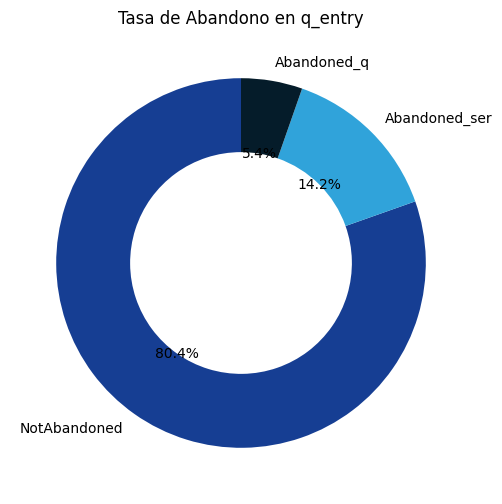

In [87]:
# Agrupamos por cantidad para cada valor de la serie category_quit
category_quit_counts = df['category_quit'].value_counts()

# Mckinsey-inspired colors
colors = ['#163E93','#30A3DA','#051C2A','#060200','#FFFFFF']

# Create a pie chart using the Mackinsley-inspired colors
plt.figure(figsize=(6, 6))
plt.pie(category_quit_counts, labels=category_quit_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=colors)
plt.title('Tasa de Abandono en q_entry')
plt.show()

Vamos a analizar de estos llamados abandonados cual es la distribución de clientes o clientes con prioridad:

In [91]:
df_filtro_abandonan = df[(df['category_quit'] == 'Abandoned_q') | (df['category_quit'] == 'Abandoned_ser')]
df_filtro_abandonan['customer_id'].count()

87029

In [92]:
df_filtro_abandonan['customer_category'].value_counts()

customer_category
CustomerIded         36664
Prospect_Customer    26027
CustomerNotId        24347
Name: count, dtype: int64

In [93]:
average_vru_time = df_filtro_abandonan.groupby('customer_category')['vru_time'].mean()
print(average_vru_time)

customer_category
CustomerIded          5.999045
CustomerNotId        34.823839
Prospect_Customer    12.210666
Name: vru_time, dtype: float64


In [94]:
category_counts = df_filtro_abandonan['customer_category'].value_counts()

# Calculamos el total por categoria
total_count = category_counts.sum()

# Calculamos el porcentaje para cada categoria sobre el total de abandonos
category_percentages = round((category_counts / total_count) * 100,0)

# Guardamos esta informacion en un dataframe para verlo como tabla
result_df = pd.DataFrame({'Count': category_counts, 'Percentage': category_percentages})
result_df

,Count,Percentage
customer_category,,
CustomerIded,36664,42.0
Prospect_Customer,26027,30.0
CustomerNotId,24347,28.0


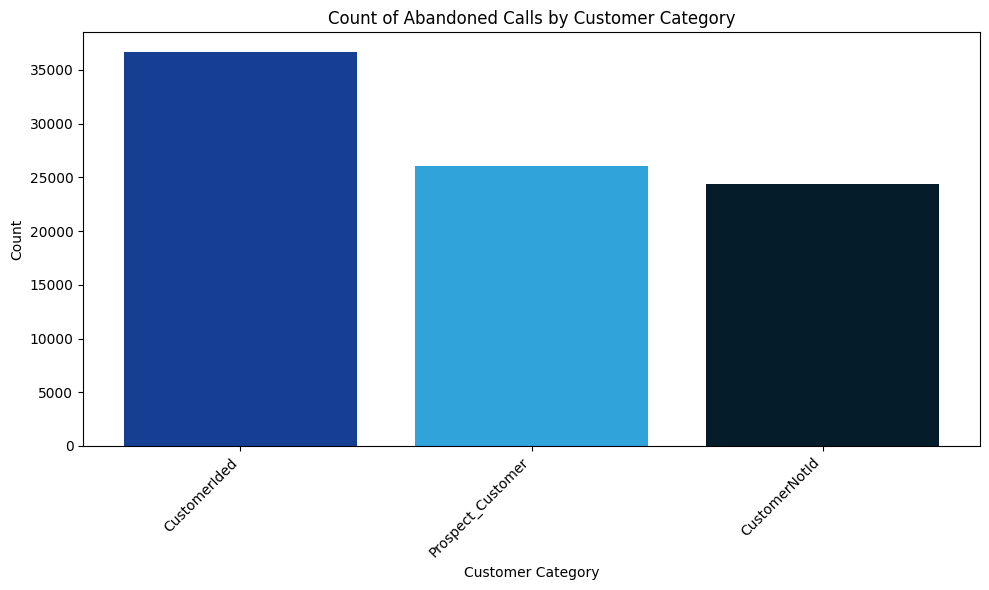

In [98]:
colors = ['#163E93','#30A3DA','#051C2A','#060200','#FFFFFF']

# Sort the DataFrame by counts in descending order
result_df_sorted = result_df.sort_values(by='Count', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(result_df_sorted.index, result_df_sorted['Count'], color=colors)

# Add labels and title
plt.xlabel('Customer Category')
plt.ylabel('Count')
plt.title('Count of Abandoned Calls by Customer Category')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### Analizamos si hay relación entre la tasa de abandono y los tiempos de espera en el vru_time ya que la tasa es muy alta y contamos con poca información para poder definir la razón o causalidad<br> 

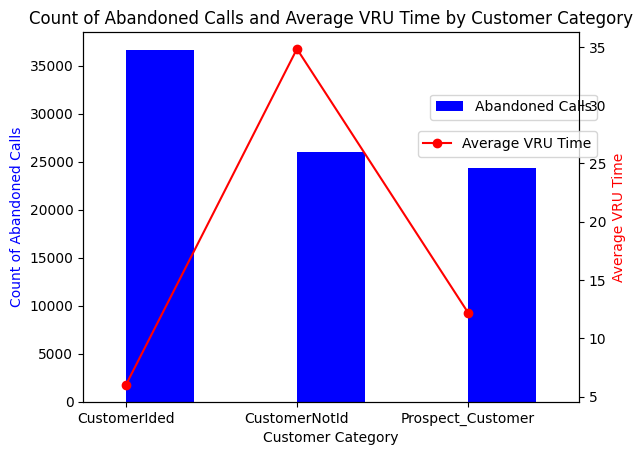

In [99]:
# Calculamos la tasa de abandono por categorias
count_abandoned_calls = df_filtro_abandonan['customer_category'].value_counts()

# Calculamos el vru_time promedio por customer category
average_vru_time = df_filtro_abandonan.groupby('customer_category')['vru_time'].mean()

# Vamos a graficarlos
fig, ax1 = plt.subplots()

# Garficamos con barras las llamadas que abandonan
count_abandoned_calls.plot(kind='bar', ax=ax1, color='b', position=0, width=0.4, label='Abandoned Calls')

# Creamos un segundo grafico para el promedio
ax2 = ax1.twinx()
average_vru_time.plot(kind='line', ax=ax2, color='r', marker='o', label='VRU Time Promedio')
ax1.set_xlabel('Customer Category')
ax1.set_ylabel('Cantidad de Abandonos ', color='b')
ax2.set_ylabel('Promedio vru_time', color='r')
plt.title('Cantidad de Abandonos y Promedio de vru_time por Categoria')
ax1.tick_params(axis='x', rotation=0)
ax1.legend(loc='upper right', bbox_to_anchor=(1.05, 0.85))
ax2.legend(loc='upper right', bbox_to_anchor=(1.05, 0.75))
plt.show()

## Tasa de Abandono -Conclusiones

Como pudimos ver, el 42% de los llamados que abandonan son llamados que no han podido ser identificados. y el 58% corresponden a clientes sin identificar.
Pudimos analizar este comportamiento contra el tiempo de espera en el vru_time y validar que no tiene incidencia en la tasa de abandonos.<br>

Solo podemos decir como conclusión que la **tasa de abandono era en principio muy alta** pero analizando los datos en corrección podemos ver que la tasa baja del 60% al 20%.<br>

## 3.3.12 q_time 
### Correccion
A los clientes de Alta Prioridad ('priority' ==2) se les asigna un tiempo de espera de 1.5 minutos al comienzo de su llamada (esto les permite avanzar en la posición de la cola de llamadas). <br> 
También están exentos de pagar un fee mensual, que los clientes regulares deben pagar.<br>
Para analizar los tiempos de espera reales y ver el servicio que se les da verdaderamente a los clientes con prioridad 2 necesitamos normalizar los verdaderos tiempos en cola restando a los clientes con prioridad 2 los 90 minutos que se les adiciona al ingresar en la cola, por su condicion.<br>

In [100]:
# Se agrega una columna con los tiempos reales de espera (es decir, se les resta al q_time de los clientes con prioridad == 2 los 90 segundos que se adicionaron para aumentarles la prioridad)
def corregir_q_time(row):
    if row['priority'] == 2:
        modified_value = row['q_time'] - 90
        return max(modified_value, 0)
    else:
        return row['q_time']

# Corregimos directamente sobre la columna q_time
df['q_time'] = df.apply(corregir_q_time, axis=1)

In [101]:
df['q_time'].describe()

count    444333.000000
mean         42.300133
std         113.657125
min           0.000000
25%           0.000000
50%           0.000000
75%          44.000000
max       28693.000000
Name: q_time, dtype: float64

### Ahora tenemos los tiempos reales de espera en cola.
Vamos a buscar outliers en nuestros datos

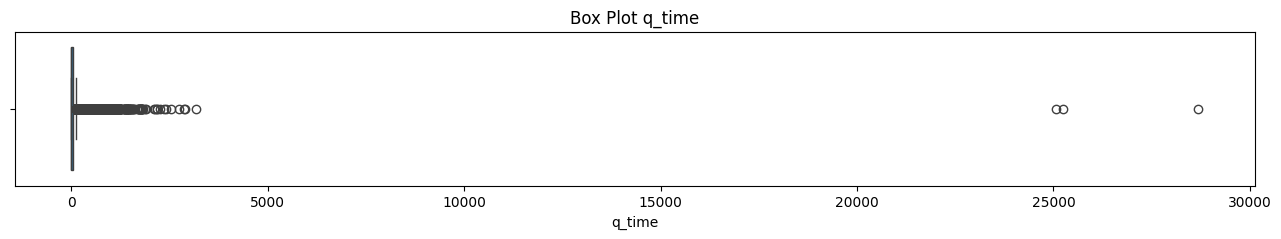

In [102]:
# Box plot
plt.figure(figsize=(16, 2))
sns.boxplot(x=df['q_time'])
plt.title('Box Plot q_time')
plt.xlabel('q_time')
plt.show()

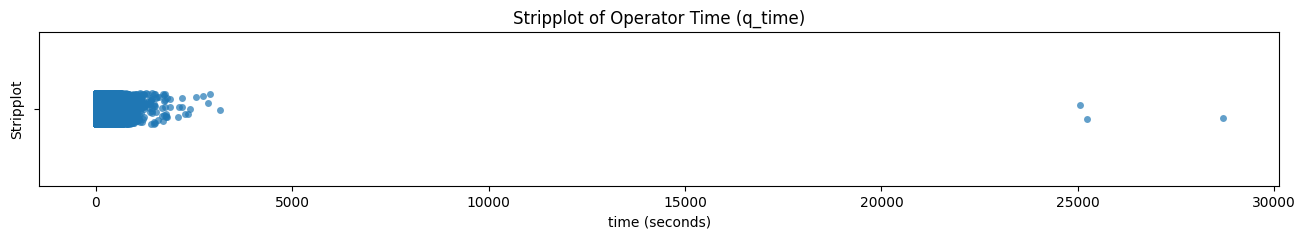

In [103]:
# Strip plot
plt.figure(figsize=(16, 2))
sns.stripplot(data=df, x='q_time', jitter=True, alpha=0.7)
plt.xlabel('time (seconds)')
plt.ylabel('Stripplot')
plt.title('Stripplot of Operator Time (q_time)')
plt.show()

Text(0.5, 1.0, 'Zoomed Boxplot for Values < 30 seconds')

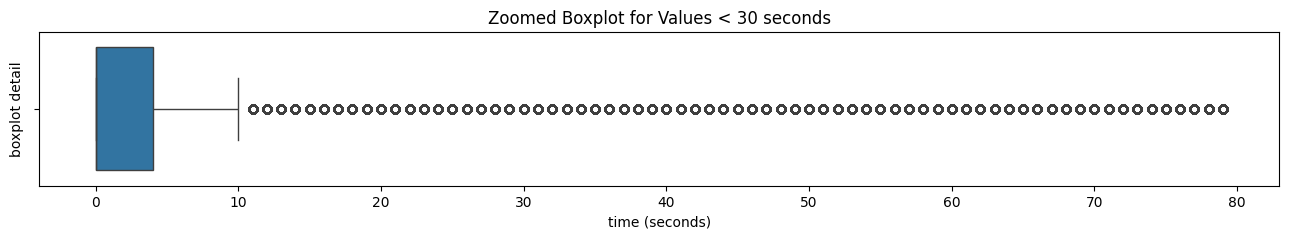

In [104]:
# Zoomed Box Plot
plt.figure(figsize=(16, 2))
sns.boxplot(data=df[df['q_time'] < 80], x='q_time')
plt.xlabel('time (seconds)')
plt.ylabel('boxplot detail')
plt.title('Zoomed Boxplot for Values < 30 seconds')


Se observa en los gráficos anteriores que hay 3 valores atípicos mayores a los 5000 segundos que son outliers. Los identificamos y los eliminamos.<br>

In [105]:
df = df[df['q_time'] < 20000]
(df['q_time'] > 20000).sum()

0

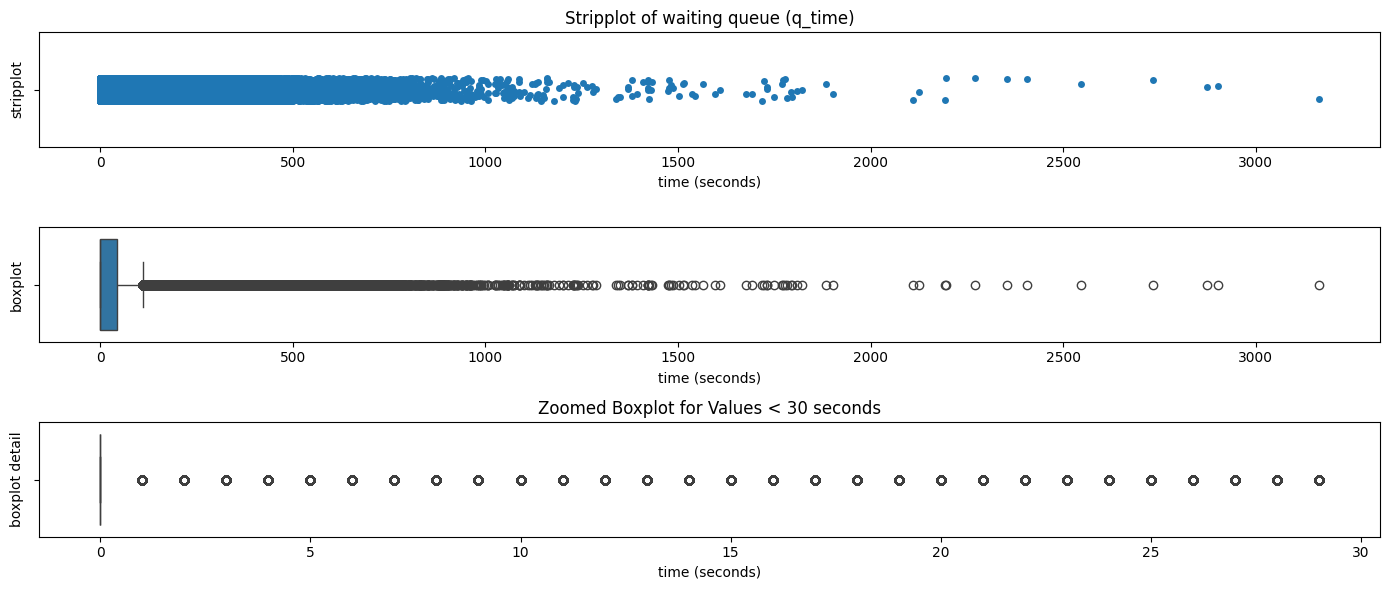

In [106]:
# Se grafican nuevamente
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(311)
sns.stripplot(data=df, x='q_time', ax=ax1)
ax1.set_xlabel('time (seconds)') ; ax1.set_ylabel('stripplot') ; ax1.set_title('Stripplot of waiting queue (q_time)')

ax2 = fig.add_subplot(312, sharex=ax1)
sns.boxplot(data=df, x='q_time', ax=ax2)
ax2.set_xlabel('time (seconds)') ; ax2.set_ylabel('boxplot')

ax3 = fig.add_subplot(313)
sns.boxplot(data=df[df['q_time'] < 30], x='q_time', ax=ax3)
ax3.set_xlabel('time (seconds)') ; ax3.set_ylabel('boxplot detail') ; ax3.set_title('Zoomed Boxplot for Values < 30 seconds')

plt.tight_layout()

Buscamos detectar outliers mas alla de los obvios anteriores.

In [107]:
outlier_count = (df['q_time'] > 2000).sum()
perc_outlier = round(outlier_count/df['q_time'].count()*100,2)
print('Cantidad de valores outlier sobre 2000 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 2000 segundos:  12
Porcentaje sobre el total: 0.0 %


In [108]:
outlier_count = (df['q_time'] > 1000).sum()
perc_outlier = round(outlier_count/df['q_time'].count()*100,2)
print('Cantidad de valores outlier sobre 1000 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 1000 segundos:  131
Porcentaje sobre el total: 0.03 %


## Outliers 
Considerando:<br>
*   Definiendo outliers a los valores mayores a 2000 segundos de espera en cola, se identifican 12 registros, una cantidad despreciable frente a los 444.443 registros totales.<br>
*   Refinando, podemos definir como outlier a cualquier cola mayor a 1000 segundos (16 minutos). Estos son apenas 138 registros (incluyen los anteriores).<br>
**Se elige eliminar todos ya que no aportan informacion adicional, pero si generan un desvio a los tiempos promedios y desvios en cola.**

In [109]:
df = df[df['q_time'] <= 1000] # se elimina a todos los valores mayores a 1000 segundos de espera 138 llamadas
(df['q_time'] > 1000).sum()

0

## Correcciones de q_time por los clientes que abandonan
Ahora vamos a meternos a analizar la distribución de la variable q_time, su comportamiento y luego, la relación de la misma con el volumen de llamadas.<br>
Nuestro objetivo en este apartado será responder si cuando aumenta el caudal de llamadas se incrementan los tiempos de espera en cola, si tienen incidencia en el resultado del servicio.<br>
**Es decir, si un aumento en la variable cantidad de llamados por hora hace que aumente el tiempo de espera en cola q_time**
Por ejemplo, si los clientes prioritarios tienen que tener garantizado el tiempo de espera menor a 1.5 minutos, entonces esta relación es muy importante para poder dimensionar el call center con el objetivo de garantizar el nivel de servicio para estos clientes<br>

In [110]:
df.head()

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,...,ser_start,ser_exit,ser_time,server,customer_category,mes,dia,vru_entry_corr,vru_exit_corr,category_quit
0,AA0101,33116,9664491.0,2,PS,1999-01-01,1999-01-01 00:00:31,1999-01-01 00:00:36,5,1999-01-01 00:00:36,...,1999-01-01 00:00:00,1999-01-01 00:00:00,0,NO_SERVER,CustomerIded,1,1,1999-01-01 00:00:31,1999-01-01 00:00:36,Abandoned_ser
1,AA0101,33117,0.0,0,PS,1999-01-01,1999-01-01 00:34:12,1999-01-01 00:34:23,11,1999-01-01 00:00:00,...,1999-01-01 00:00:00,1999-01-01 00:00:00,0,NO_SERVER,CustomerNotId,1,1,1999-01-01 00:34:12,1999-01-01 00:34:23,Abandoned_q
2,AA0101,33118,27997683.0,2,PS,1999-01-01,1999-01-01 06:55:20,1999-01-01 06:55:26,6,1999-01-01 06:55:26,...,1999-01-01 06:55:43,1999-01-01 06:56:37,54,MICHAL,CustomerIded,1,1,1999-01-01 06:55:20,1999-01-01 06:55:26,NotAbandoned
3,AA0101,33119,0.0,0,PS,1999-01-01,1999-01-01 07:41:16,1999-01-01 07:41:26,10,1999-01-01 00:00:00,...,1999-01-01 07:41:25,1999-01-01 07:44:53,208,BASCH,CustomerNotId,1,1,1999-01-01 07:41:16,1999-01-01 07:41:26,NotAbandoned
4,AA0101,33120,0.0,0,PS,1999-01-01,1999-01-01 08:03:14,1999-01-01 08:03:24,10,1999-01-01 00:00:00,...,1999-01-01 08:03:23,1999-01-01 08:05:10,107,MICHAL,CustomerNotId,1,1,1999-01-01 08:03:14,1999-01-01 08:03:24,NotAbandoned


In [122]:
# Filtramos por los q_time de los clientes que abandonan para que no nos afecte el calculo del minimo, promedio y maximo
filtered_df = df[df['category_quit'] != 'Abandoned_q'] #23.828 rows
filtered_df['q_time'].describe()

count    420371.000000
mean         44.086260
std          89.234266
min           0.000000
25%           0.000000
50%           0.000000
75%          50.000000
max         997.000000
Name: q_time, dtype: float64

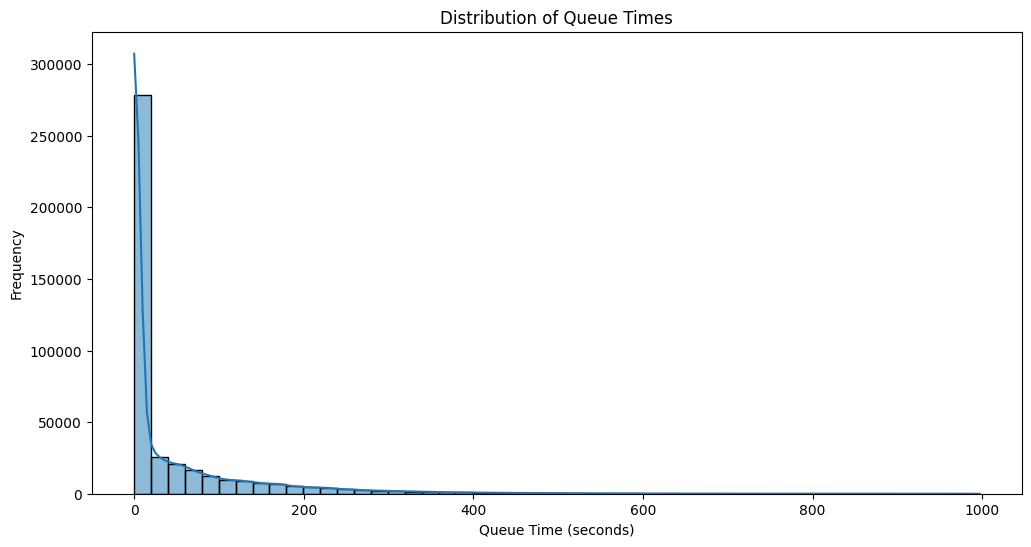

In [116]:
# Graficamos la distribucion de q_time para las llamadas no abandonadas antes de q_start
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df['q_time'], bins=50, kde=True)
plt.title('Distribution of Queue Times')
plt.xlabel('Queue Time (seconds)')
plt.ylabel('Frequency')
plt.show()

Vemos como se modifican los valores medios, maximo, minimo y desvios:

In [117]:
df['q_time'].describe()

count    444199.000000
mean         41.721357
std          87.374352
min           0.000000
25%           0.000000
50%           0.000000
75%          44.000000
max         997.000000
Name: q_time, dtype: float64

In [118]:
filtered_df['q_time'].describe()

count    420371.000000
mean         44.086260
std          89.234266
min           0.000000
25%           0.000000
50%           0.000000
75%          50.000000
max         997.000000
Name: q_time, dtype: float64

### Analizamos ahora el nivel de servicio a los clientes prioritarios ('priority' == 2)

In [134]:
# Filtramos las llamadas que efectivamente no abandonaron la cola y filtramos las que corresponden a clientes prioritarios
non_abandoned_priority_calls = filtered_df[(filtered_df['priority'] == 2)]

# Calculamos para ellos el tiempo promedio de espera en cola
average_waiting_time_priority_calls = non_abandoned_priority_calls['q_time'].mean()

print(f"Cantidad de llamadas prioritarias: {len(non_abandoned_priority_calls)}")
print(f"Promedio de espera en cola para los prioritarios: {average_waiting_time_priority_calls}")
print("\nResumen de Estadísticas para los clientes prioritarios:")
print(non_abandoned_priority_calls['q_time'].describe())

Cantidad de llamadas prioritarias: 137412
Promedio de espera en cola para los prioritarios: 32.63044712252205

Resumen de Estadísticas para los clientes prioritarios:
count    137412.000000
mean         32.630447
std          75.086060
min           0.000000
25%           0.000000
50%           0.000000
75%          27.000000
max         982.000000
Name: q_time, dtype: float64


### Conclusiones q_time
Sobre los **clientes que efectivamente son atendidos**, el 80% que permanece:
-   El *tiempo promedio en cola de espera es 89 segundos (1.43 minutos)*
-   El 25% de las llamadas permanecen en cola menos de 1 segundo, son atendidas de inmediato.
-   El 75% de los clientes en cola espera menos de 1 minuto, 50 segundos.

Sobre los **clientes con prioridad** ('priority' ==2), que son atendidos, o permanecen en cola hasta ser atendidos:
-   El total de **clientes con prioridad atendidos** es de 137.412 llamados, es **99% de los clientes prioritarios** que llamaron y fueron identificados
-   El tiempo promedio de espera en cola para ellos es de **32 segundos** equivalente a 0.5 minutos promedio.
-   El **50% es atendido enseguida, 0 segundos** por arriba del nivel de servicio.
-   El **restante 25%, 75% permanece en cola menos de 30 segundos**. 

### Vemos de los que permanecen en cola, como es la distribución de categorias y cual es su tiempo promedio de espera en cola.

In [123]:
df_filtro_noabandonan = df[(df['category_quit'] != 'Abandoned_q') & (df['category_quit'] != 'Abandoned_ser')]
df_filtro_noabandonan['customer_id'].count()

357199

In [124]:
df_filtro_noabandonan['customer_category'].value_counts()

customer_category
CustomerIded         172881
CustomerNotId        142668
Prospect_Customer     41678
Name: count, dtype: int64

In [125]:
average_vru_time_not = df_filtro_noabandonan.groupby('customer_category')['vru_time'].mean()
print(average_vru_time_not)

customer_category
CustomerIded          5.645837
CustomerNotId        11.232953
Prospect_Customer    11.628701
Name: vru_time, dtype: float64


In [127]:
category_counts_not = df_filtro_noabandonan['customer_category'].value_counts()
# Calculamos el total por categoria
total_count_not = category_counts_not.sum()

# Calculamos el porcentaje para cada categoria sobre el total de abandonos
category_percentages_not = round((category_counts_not / cantidad_total) * 100,0)

# Guardamos esta informacion en un dataframe para verlo como tabla
not_result_df = pd.DataFrame({'Count': category_counts_not, 'Percentage': category_percentages_not})
not_result_df

,Count,Percentage
customer_category,,
CustomerIded,172881,39.0
CustomerNotId,142668,32.0
Prospect_Customer,41678,9.0


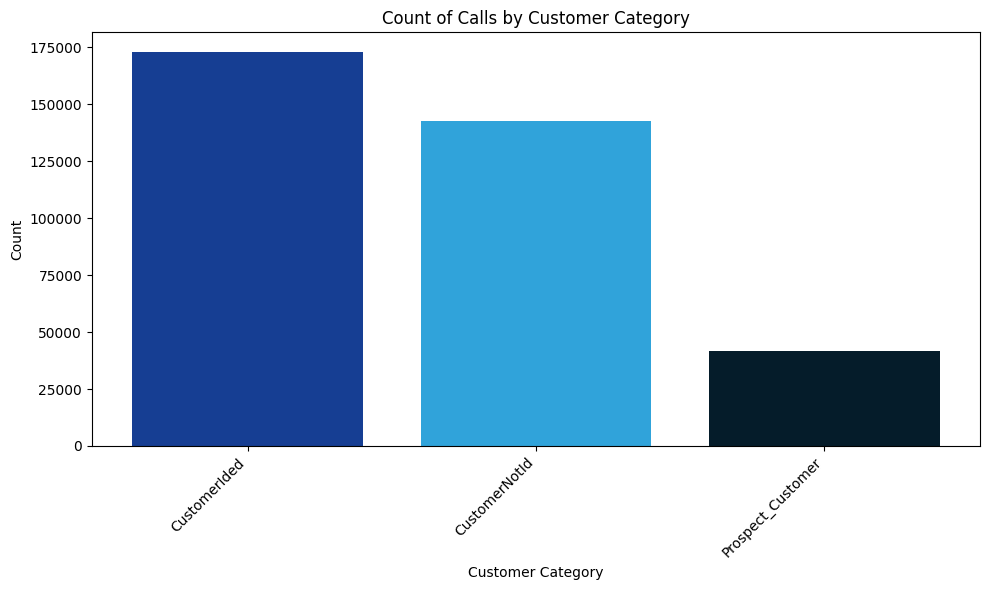

In [128]:
colors = ['#163E93','#30A3DA','#051C2A','#060200','#FFFFFF']

# Sort the DataFrame by counts in descending order
not_result_df_sorted = not_result_df.sort_values(by='Count', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(not_result_df_sorted.index, not_result_df_sorted['Count'], color=colors)

# Add labels and title
plt.xlabel('Customer Category')
plt.ylabel('Count')
plt.title('Count of Calls by Customer Category')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


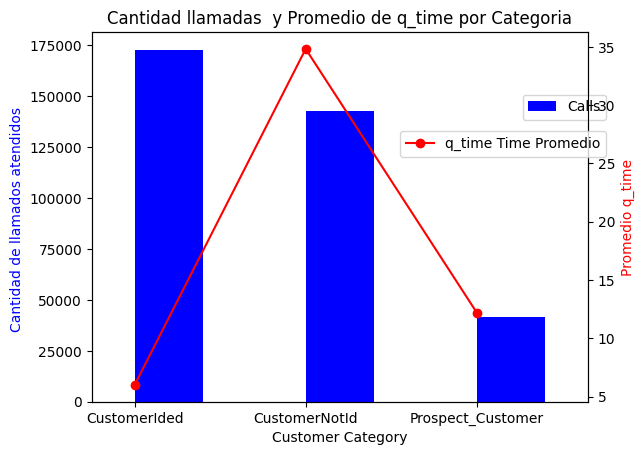

In [129]:
# Calculamos por categorias
count_not_abandoned_calls = df_filtro_noabandonan['customer_category'].value_counts()

# Calculamos el vru_time promedio por customer category
not_average_vru_time = df_filtro_noabandonan.groupby('customer_category')['q_time'].mean()

# Vamos a graficarlos
fig, ax1 = plt.subplots()

# Garficamos con barras las llamadas que abandonan
count_not_abandoned_calls.plot(kind='bar', ax=ax1, color='b', position=0, width=0.4, label='Calls')

# Creamos un segundo grafico para el promedio
ax2 = ax1.twinx()
average_vru_time.plot(kind='line', ax=ax2, color='r', marker='o', label='q_time Time Promedio')
ax1.set_xlabel('Customer Category')
ax1.set_ylabel('Cantidad de llamados atendidos ', color='b')
ax2.set_ylabel('Promedio q_time', color='r')
plt.title('Cantidad llamadas  y Promedio de q_time por Categoria')
ax1.tick_params(axis='x', rotation=0)
ax1.legend(loc='upper right', bbox_to_anchor=(1.05, 0.85))
ax2.legend(loc='upper right', bbox_to_anchor=(1.05, 0.75))
plt.show()


# Conclusiones q_time para las llamadas atendidas
La tasa de servicio para las llamadas que no abandonan, el 80% de las llamadas, es muy bueno. Esta muy por debajo de lo prometido para los clientes prioritarios, y de hecho se cumple para todos los clientes prioritarios o no.
* Es decir, **el 75% de los clientes**, sean o no prioritarios son atendidos en menos de 50 segundos, con un tiempo promedio en cola de 89 segundos = **1.43 minutos**
* Por lo tanto se da un **servicio premium a todos los clientes sin distinción**. 

## 3.3.13 outcome


In [90]:
df['outcome'].value_counts()

outcome
AGENT      353080
HANG        87521
PHANTOM      3591
Name: count, dtype: int64

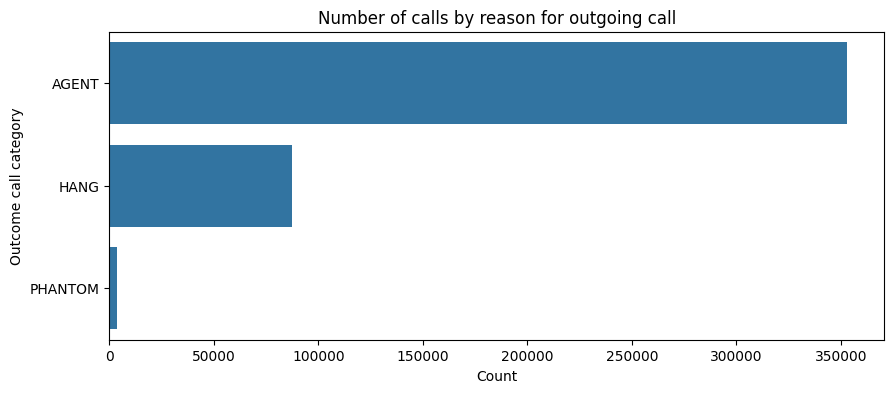

In [91]:
cantidad = df['outcome'].value_counts()

plt.figure(figsize=(10, 4))
sns.barplot(x=cantidad.values, y=cantidad.index)
plt.xlabel('Count')
plt.ylabel('Outcome call category')
plt.title('Number of calls by reason for outgoing call')
plt.show()

Se observan 3 categorías de posibles salidas de las llamadas tal lo informado:
*   La categoría predominante es **AGENT** que significa que se dio servicio. 
*   Esto ocurre en **el 79% de las llamadas**. 
*   Alrededor del **20% son llamados donde el cliente cortó o no se dio el servicio**.

Hay 3 posibilidades de resolucion de una llamada:<br>

1.  **AGENT** =  el **79% de las llamadas**
2.  **HANG** =  el **20% de las llamadas ingresadas**.
3.  **PHANTOM** = **Son 4.440 llamadas en total, un promedio de 12 llamadas por dia. Un 1%** (una llamada en la que virtualmente se ignora)

## 3.3.14 ser_start y 3.3.15 ser_exit

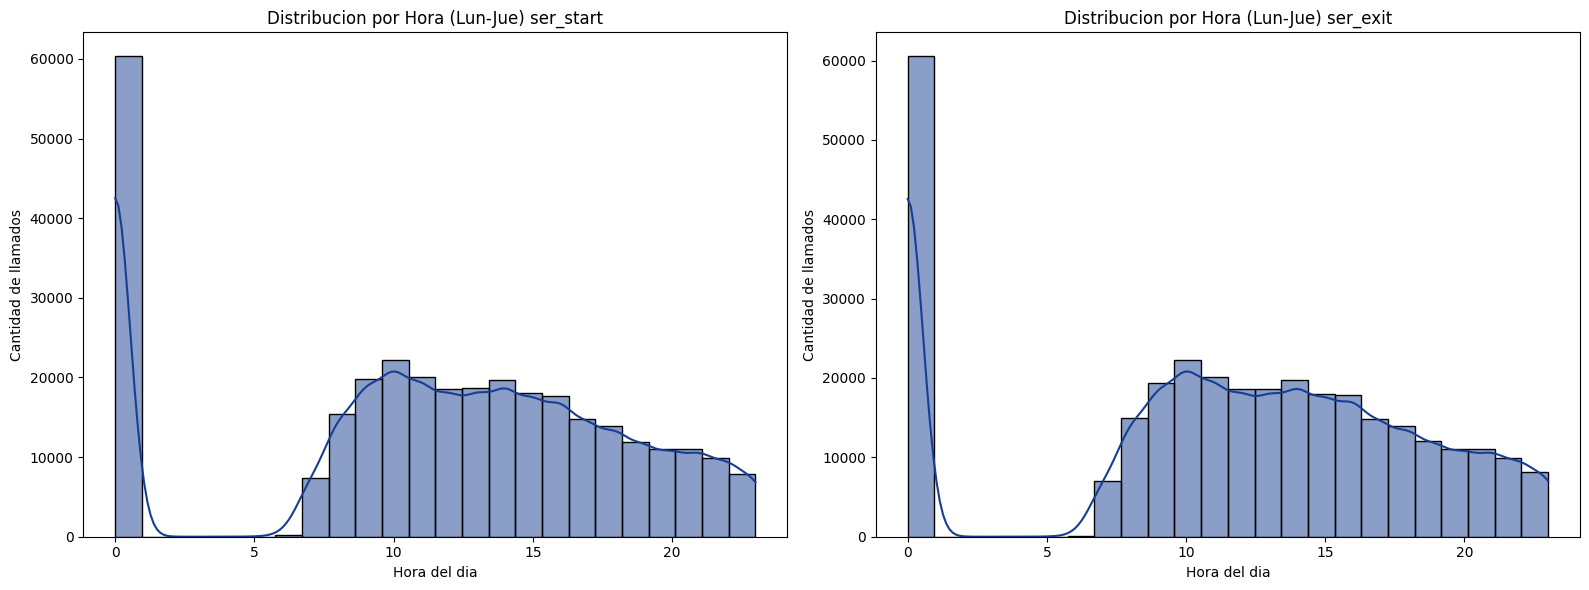

In [130]:
# Extraemos la hora de  'q_start' y de 'q_exit'
weekday_df['ser_start_hour'] = weekday_df['ser_start'].dt.hour
weekday_df['ser_exit_hour'] = weekday_df['ser_exit'].dt.hour

# graficamos ambos juntos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Distribucion de tiempo en cola entrada
sns.histplot(weekday_df['ser_start_hour'], bins=24, kde=True, color='#163E93', ax=axes[0])
axes[0].set_title('Distribucion por Hora (Lun-Jue) ser_start')
axes[0].set_xlabel('Hora del dia')
axes[0].set_ylabel('Cantidad de llamados')

# Distribucion de tiempo en cola salida
sns.histplot(weekday_df['ser_exit_hour'], bins=24, kde=True, color='#163E93', ax=axes[1])
axes[1].set_title('Distribucion por Hora (Lun-Jue) ser_exit')
axes[1].set_xlabel('Hora del dia')
axes[1].set_ylabel('Cantidad de llamados')
plt.tight_layout()
plt.show()

In [132]:
# abandonan = (df['ser_start'].dt.time == pd.to_datetime('00:00:00').time()).sum()
# perc_abandonan = round(abandonan/df['ser_start'].count()*100, 2)
print('Cantidad abandonan en ser: ', cant_abandonan_ser)
print('Porcentaje sobre el total:', porcentaje_abandonan_ser)

Cantidad abandonan en ser:  63210
Porcentaje sobre el total: 14.0


-   La **tasa de abandono** en esta etapa es algo mas alta: unos **63210 llamados** que es aproximadamente el **14% del total de las llamadas que ingresan** y el 15% del total de llamadas que pasan la primer cola de espera.
-   del total de llamadas que **persisten en el servicio**, unas 420.371 llamadas:

*   **Llegan a ser atentidas 357.227 llamadas**, el *80% del total de las llamadas registradas*:
-   De este total, los *clientes prioritarios* corresponden a **137.4123 llamados**, son el *38% del total de los llamados*
-   Adicionalmente, para estos clientes, el tiempo de servicio promedio fue de **208 segundos en total** unos 3.46 minutos.

In [136]:
# Filtramos las llamadas que corresponden a prioritarios que no fueran abandonadas
prioritarias_no_abandonan = df[(df['category_quit'] =='NotAbandoned') & (df['priority'] == 2)]

# Calculate the average waiting time for priority calls
promedio_prioritarias_no_abandonan = prioritarias_no_abandonan['ser_time'].mean()

# Display the result
print(f"Numero de llamadas atendidas prioritarias: {len(prioritarias_no_abandonan)}")
print(f"Promedio de espera en cola para llamadas prioritarias: {promedio_prioritarias_no_abandonan}")
print("\nResumen Estadístico de llamadas prioritarias que no se abandonan:")
print(prioritarias_no_abandonan['ser_time'].describe())

Numero de llamadas atendidas prioritarias: 118095
Promedio de espera en cola para llamadas prioritarias: 208.31644015411322

Resumen Estadístico de llamadas prioritarias que no se abandonan:
count    118095.000000
mean        208.316440
std         285.399565
min           0.000000
25%          67.000000
50%         131.000000
75%         254.000000
max       30278.000000
Name: ser_time, dtype: float64


## 3.3.16 ser_time


In [137]:
df['ser_time'].describe()

count    444199.000000
mean        152.387970
std         263.423452
min           0.000000
25%          12.000000
50%          84.000000
75%         185.000000
max       36291.000000
Name: ser_time, dtype: float64

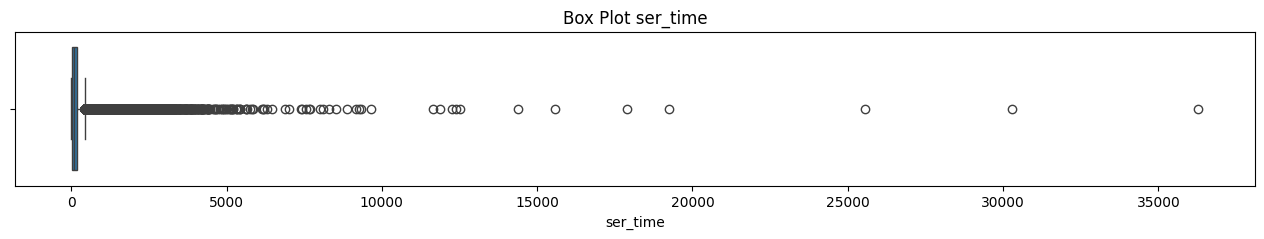

In [138]:
# Box plot
plt.figure(figsize=(16, 2))
sns.boxplot(x=df['ser_time'])
plt.title('Box Plot ser_time')
plt.xlabel('ser_time')
plt.show()

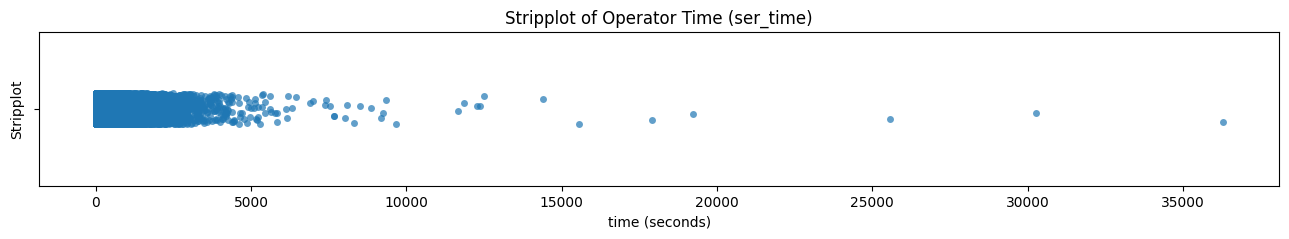

In [139]:
# Strip plot
plt.figure(figsize=(16, 2))
sns.stripplot(data=df, x='ser_time', jitter=True, alpha=0.7)
plt.xlabel('time (seconds)')
plt.ylabel('Stripplot')
plt.title('Stripplot of Operator Time (ser_time)')
plt.show()

Text(0.5, 1.0, 'Zoomed Boxplot for Values < 30 seconds')

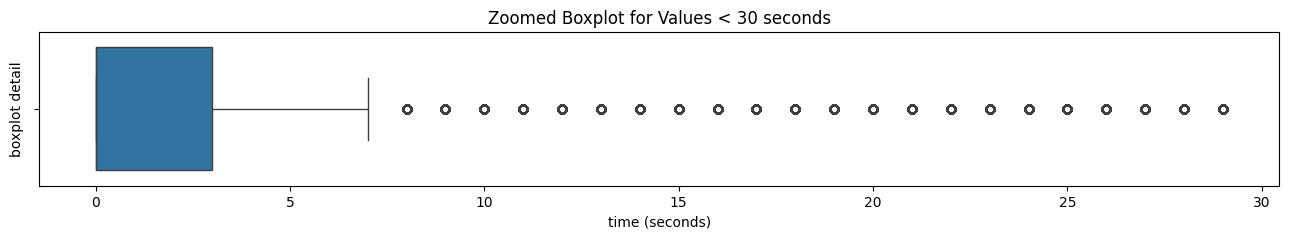

In [140]:
# Zoomed Box Plot
plt.figure(figsize=(16, 2))
sns.boxplot(data=df[df['ser_time'] < 30], x='ser_time')
plt.xlabel('time (seconds)')
plt.ylabel('boxplot detail')
plt.title('Zoomed Boxplot for Values < 30 seconds')

In [141]:
abandonos = (df['ser_time'] == 0).sum()
perc_abandonos = round(abandonos/df['ser_time'].count()*100,2)
print('Cantidad de valores de 0 segundos: ', abandonos)
print('Porcentaje sobre el total:', perc_abandonos, '%')

Cantidad de valores de 0 segundos:  87682
Porcentaje sobre el total: 19.74 %


In [142]:
# Definiendo outlier de ser_time cuando es mayor a 25000 segundos
outlier_count = (df['ser_time'] > 25000).sum()
perc_outlier = round(outlier_count/df['ser_time'].count()*100,2)
print('Cantidad de valores outlier sobre 25000 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 25000 segundos:  3
Porcentaje sobre el total: 0.0 %


In [143]:
# Definiendo outlier de ser_time cuando es mayor a 1000 segundos
outlier_count = (df['ser_time'] > 1000).sum()
perc_outlier = round(outlier_count/df['ser_time'].count()*100,2)
print('Cantidad de valores outlier sobre 1000 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 1000 segundos:  5790
Porcentaje sobre el total: 1.3 %


*   Como vimos, la *tasa de abandono en esta etapa es del 14%* de las llamadas.(ser_time ==0) 
*   Se opta por una definicion de outliers de ser_time mayores a 1000 segundos.
*   Estos representan el 1.3% de los datos. Los eliminamos y volvemos a calcular las caracteristicas del servicio

In [144]:
df = df[df['ser_time'] <= 1000]
(df['ser_time'] > 1000).sum()

0

In [151]:
df['ser_time'].describe()

count    438409.000000
mean        133.687326
std         165.010813
min           0.000000
25%          10.000000
50%          82.000000
75%         178.000000
max        1000.000000
Name: ser_time, dtype: float64

*   Ahora tenemos tiempos de servicio con una **media de 133 segundos por llamado**, apenas unos 2.21 minutos.
*   El **75% de los llamados se resuelven en menos de 178 segundos, 2.96 minutos**

## 3.3.17 server


In [146]:
# Se quieren ver todas las categorías
count_server = df['server'].value_counts()
category_server = pd.DataFrame({'Category': count_server.index, 'Count': count_server.values})
category_server

,Category,Count
0,NO_SERVER,96274
1,SHARON,27350
2,STEREN,20338
3,AVNI,19787
4,MORIAH,19422
5,AVI,19366
6,KAZAV,18527
7,YITZ,16962
8,TOVA,16957
9,BASCH,15456


In [149]:
top5 = df['server'].value_counts()[:5]
top5

server
NO_SERVER    96274
SHARON       27350
STEREN       20338
AVNI         19787
MORIAH       19422
Name: count, dtype: int64

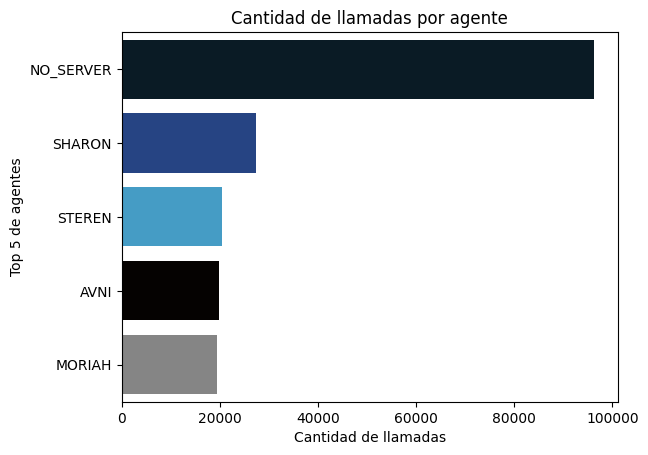

In [150]:
#color pallete
colors = ['#051C2A','#163E93','#30A3DA','#060200','#858585']

# Use the palette parameter to set your custom color palette
sns.barplot(x=top5.values, y=top5.index.tolist(), hue=top5.index.tolist(), palette=colors, dodge=False)
plt.xlabel('Cantidad de llamadas')
plt.ylabel('Top 5 de agentes')
plt.title('Cantidad de llamadas por agente')
plt.show()

In [152]:
# calculamos la distribucion por grupo 
round(((df['server'].value_counts() / len(df)) * 100),2)[:5]

server
NO_SERVER    21.96
SHARON        6.24
STEREN        4.64
AVNI          4.51
MORIAH        4.43
Name: count, dtype: float64

Hay 53 categorías de agentes que atienden los llamadas. Según se informa, la categoría NO_SERVER significa que a esa llamada no se le dio servicio. Esta categoría se encuentra en casi 22% de las llamadas.

Sin embargo, se tienen dudas de la calidad de esta columna, dado que se encontraron otras categorías que podrían significar lo mismo que NO_:_SERVER, como ANO_SERVERT y NO_SERVERAMA.

Por otra parte, se observa que el agente que mas llamados atiende es SHARON con el 6% de las llamadas, pero dada la calidad de la columna, donde se encontraron nombres que comienzan con Z1 y Z2, sin ninguna información al respecto, no se puede avanzar con el análisis certero de esta columna.

Si bien es una columna muy importante, hasta tanto tener mas información al respecto para la limpieza. Se elimina del conjunto.

In [153]:
# Eliminación de server
df = df.drop('server', axis=1)

# Guardamos el dataset limpio 

In [154]:
# Guardamos el DF en un .csv para poder trabajarlo en Power BI
output_path = r'C:\Users\flore\OneDrive\Escritorio\Call_Center\1 Call Center\callcenter_ok.csv'
df.to_csv(output_path, index=False)